In [1]:
import xarray as xr 
from matplotlib import pyplot as plt

In [2]:
import os

In [3]:
os.chdir("C:/Users/SHRINJANA/Downloads")

In [4]:
sd = xr.open_dataset('surge-days_day_ERA5_historical_195911-202302.nc')

In [5]:
sd.keys()

KeysView(<xarray.Dataset> Size: 123kB
Dimensions:    (time: 7680)
Coordinates:
  * time       (time) datetime64[ns] 61kB 1959-11-01 1959-11-02 ... 2023-02-28
Data variables:
    surge-day  (time) float64 61kB ...
Attributes:
    CDI:          Climate Data Interface version 2.2.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Sep 19 16:10:58 2023: cdo -O -s -setname,surge-day /var...
    CDO:          Climate Data Operators version 2.2.2 (https://mpimet.mpg.de...)

In [6]:
# Selecting the desired data
subset = sd.sel(time=slice("1987-01-11", "2015-02-28"))

# Extracting time and values
time_coords = subset['time'].values
values = subset['surge-day'].values

# Printing the time and associated values
for time, value in zip(time_coords, values):
    if value==1.0:
        print(f"Time: {time}, Value: {value}")


Time: 1987-01-11T00:00:00.000000000, Value: 1.0
Time: 1987-01-12T00:00:00.000000000, Value: 1.0
Time: 1987-01-13T00:00:00.000000000, Value: 1.0
Time: 1987-01-14T00:00:00.000000000, Value: 1.0
Time: 1987-01-16T00:00:00.000000000, Value: 1.0
Time: 1987-01-23T00:00:00.000000000, Value: 1.0
Time: 1987-01-24T00:00:00.000000000, Value: 1.0
Time: 1987-01-25T00:00:00.000000000, Value: 1.0
Time: 1987-01-26T00:00:00.000000000, Value: 1.0
Time: 1987-01-27T00:00:00.000000000, Value: 1.0
Time: 1987-01-28T00:00:00.000000000, Value: 1.0
Time: 1987-01-31T00:00:00.000000000, Value: 1.0
Time: 1987-02-01T00:00:00.000000000, Value: 1.0
Time: 1987-02-02T00:00:00.000000000, Value: 1.0
Time: 1987-02-03T00:00:00.000000000, Value: 1.0
Time: 1987-02-04T00:00:00.000000000, Value: 1.0
Time: 1987-02-05T00:00:00.000000000, Value: 1.0
Time: 1987-12-05T00:00:00.000000000, Value: 1.0
Time: 1987-12-06T00:00:00.000000000, Value: 1.0
Time: 1987-12-07T00:00:00.000000000, Value: 1.0
Time: 1987-12-08T00:00:00.000000000, Val

In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

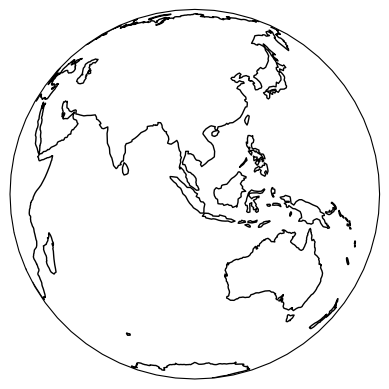

In [8]:
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=103.0, central_latitude=0.0, globe=None))
ax.coastlines()
plt.show()

langkawi daily data

In [9]:
langkawi = xr.open_dataset('d142a.nc')

In [10]:
langkawi_NJDF={'2017_18':{'NOV_2017':langkawi.sel(time=slice("2017-11-01", "2017-11-30"))['sea_level'].values, 
                       'DEC_2017':langkawi.sel(time=slice("2017-12-01", "2017-12-31"))['sea_level'].values, 
                       'JAN_2018':langkawi.sel(time=slice("2018-01-01", "2018-01-31"))['sea_level'].values,
                       'FEB_2018':langkawi.sel(time=slice("2018-02-01", "2018-02-28"))['sea_level'].values}, 
               '2016_17':{'NOV_2016':langkawi.sel(time=slice("2016-11-01", "2016-11-30"))['sea_level'].values, 
                       'DEC_2016':langkawi.sel(time=slice("2016-12-01", "2016-12-31"))['sea_level'].values, 
                       'JAN_2017':langkawi.sel(time=slice("2017-01-01", "2017-01-31"))['sea_level'].values,
                       'FEB_2017':langkawi.sel(time=slice("2017-02-01", "2017-02-28"))['sea_level'].values},
               '2015_16':{'NOV_2015':langkawi.sel(time=slice("2015-11-01", "2015-11-30"))['sea_level'].values, 
                       'DEC_2015':langkawi.sel(time=slice("2015-12-01", "2015-12-31"))['sea_level'].values, 
                       'JAN_2016':langkawi.sel(time=slice("2016-01-01", "2016-01-31"))['sea_level'].values,
                       'FEB_2016':langkawi.sel(time=slice("2016-02-01", "2016-02-29"))['sea_level'].values},
               '2014_15':{'NOV_2014':langkawi.sel(time=slice("2014-11-01", "2014-11-30"))['sea_level'].values, 
                       'DEC_2014':langkawi.sel(time=slice("2014-12-01", "2014-12-31"))['sea_level'].values, 
                       'JAN_2015':langkawi.sel(time=slice("2015-01-01", "2015-01-31"))['sea_level'].values,
                       'FEB_2015':langkawi.sel(time=slice("2015-02-01", "2015-02-28"))['sea_level'].values},
               '2013_14':{'NOV_2013':langkawi.sel(time=slice("2013-11-01", "2013-11-30"))['sea_level'].values, 
                       'DEC_2013':langkawi.sel(time=slice("2013-12-01", "2013-12-31"))['sea_level'].values, 
                       'JAN_2014':langkawi.sel(time=slice("2014-01-01", "2014-01-31"))['sea_level'].values,
                       'FEB_2014':langkawi.sel(time=slice("2014-02-01", "2014-02-28"))['sea_level'].values}}

In [11]:
for key, values in langkawi_NJDF.items():
    for key, sub_values in values.items():
        print(f"{key}:{sub_values.max()}")

NOV_2017:2434.0
DEC_2017:2500.0
JAN_2018:2279.0
FEB_2018:2209.0
NOV_2016:2444.0
DEC_2016:2525.0
JAN_2017:2462.0
FEB_2017:2218.0
NOV_2015:2372.0
DEC_2015:2436.0
JAN_2016:nan
FEB_2016:nan
NOV_2014:2429.0
DEC_2014:nan
JAN_2015:2400.0
FEB_2015:2216.0
NOV_2013:2420.0
DEC_2013:nan
JAN_2014:nan
FEB_2014:nan


In [12]:
(langkawi['sea_level'].size-int(langkawi['sea_level'].count()))/langkawi['sea_level'].size*100

3.7236243276789405

In [13]:
langkawi.sel(time=slice("2014-12-01", "2014-12-31"))['sea_level'].values

array([[2385., 2346., 2312., 2302., 2290., 2300., 2344.,   nan,   nan,
        2413., 2376., 2338., 2288., 2219., 2217., 2231., 2223., 2208.,
        2225., 2261., 2263., 2272., 2259., 2245., 2281., 2329., 2345.,
        2345., 2326., 2357., 2366.]], dtype=float32)

In [14]:
(langkawi.sel(time=slice("2014-12-01", "2014-12-31"))['sea_level'].size-int(langkawi.sel(time=slice("2014-12-01", "2014-12-31"))['sea_level'].count()))/langkawi.sel(time=slice("2014-12-01", "2014-12-31"))['sea_level'].size*100

6.451612903225806

In [15]:
langkawi_hourly=xr.open_dataset('h142a.nc')

In [16]:
print(f"8/12/2014:{langkawi_hourly.sel(time=slice("2014-12-08T00:00:00.000000000","2014-12-08T22:59:59.971200000"))['sea_level'].max()}, 9/12/2014:{langkawi_hourly.sel(time=slice("2014-12-09T00:00:00.000000000","2014-12-09T22:59:59.971200000"))['sea_level'].max()}")

8/12/2014:<xarray.DataArray 'sea_level' ()> Size: 4B
array(3309., dtype=float32), 9/12/2014:<xarray.DataArray 'sea_level' ()> Size: 4B
array(3702., dtype=float32)


In [17]:
print(f"31/12/2013:{langkawi_hourly.sel(time=slice("2013-12-31T00:00:00.000000000","2013-12-31T22:59:59.971200000"))['sea_level'].max()}")

31/12/2013:<xarray.DataArray 'sea_level' ()> Size: 4B
array(3650., dtype=float32)


In [18]:
langkawi_hourly.sel(time=slice("2014-01-01T00:00:00.000000000","2014-01-31T22:59:59.971200000"))['sea_level'].max()

<xarray.DataArray 'sea_level' ()> Size: 4B
array(nan, dtype=float32)

In [19]:
langkawi_hourly.sel(time=slice("2014-02-01T00:00:00.000000000","2014-02-28T22:59:59.971200000"))['sea_level'].max()

<xarray.DataArray 'sea_level' ()> Size: 4B
array(nan, dtype=float32)

In [20]:
langkawi_hourly.sel(time=slice("2017-11-01T00:00:00.000000000","2017-11-30T22:59:59.971200000"))['sea_level'].max()

<xarray.DataArray 'sea_level' ()> Size: 4B
array(3951., dtype=float32)

langkawi hourly data

In [21]:
langkawi_NJDF_hourly={'2017_18':{'NOV_2017':langkawi_hourly.sel(time=slice("2017-11-01T00:00:00.000000000","2017-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2017':langkawi_hourly.sel(time=slice("2017-12-01T00:00:00.000000000","2017-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2018':langkawi_hourly.sel(time=slice("2018-01-01T00:00:00.000000000","2018-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2018':langkawi_hourly.sel(time=slice("2018-02-01T00:00:00.000000000","2018-02-28T22:59:59.971200000"))['sea_level']}, 
               '2016_17':{'NOV_2016':langkawi_hourly.sel(time=slice("2016-11-01T00:00:00.000000000","2016-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2016':langkawi_hourly.sel(time=slice("2016-12-01T00:00:00.000000000","2016-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2017':langkawi_hourly.sel(time=slice("2017-01-01T00:00:00.000000000","2017-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2017':langkawi_hourly.sel(time=slice("2017-02-01T00:00:00.000000000","2017-02-28T22:59:59.971200000"))['sea_level']},
               '2015_16':{'NOV_2015':langkawi_hourly.sel(time=slice("2015-11-01T00:00:00.000000000","2015-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2015':langkawi_hourly.sel(time=slice("2015-12-01T00:00:00.000000000","2015-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2016':langkawi_hourly.sel(time=slice("2016-01-01T00:00:00.000000000","2016-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2016':langkawi_hourly.sel(time=slice("2016-02-01T00:00:00.000000000","2016-02-29T22:59:59.971200000"))['sea_level']},
               '2014_15':{'NOV_2014':langkawi_hourly.sel(time=slice("2014-11-01T00:00:00.000000000","2014-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2014':langkawi_hourly.sel(time=slice("2014-12-01T00:00:00.000000000","2014-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2015':langkawi_hourly.sel(time=slice("2015-01-01T00:00:00.000000000","2015-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2015':langkawi_hourly.sel(time=slice("2015-02-01T00:00:00.000000000","2015-02-28T22:59:59.971200000"))['sea_level']},
               '2013_14':{'NOV_2013':langkawi_hourly.sel(time=slice("2013-11-01T00:00:00.000000000","2013-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2013':langkawi_hourly.sel(time=slice("2013-12-01T00:00:00.000000000","2013-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2014':langkawi_hourly.sel(time=slice("2014-01-01T00:00:00.000000000","2014-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2014':langkawi_hourly.sel(time=slice("2014-02-01T00:00:00.000000000","2014-02-28T22:59:59.971200000"))['sea_level']}}

In [22]:
import numpy as np
for key, values in langkawi_NJDF_hourly.items():
    for key, sub_values in values.items():
        print(f"{key}:{float(sub_values.max())}, \n, {np.array(sub_values.idxmax("time"))}")

NOV_2017:3951.0, 
, ['2017-11-05T16:59:59.971200000']
DEC_2017:3997.0, 
, ['2017-12-04T16:59:59.971200000']
JAN_2018:3835.0, 
, ['2018-01-03T16:59:59.971200000']
FEB_2018:3862.0, 
, ['2018-02-01T16:59:59.971200000']
NOV_2016:4058.0, 
, ['2016-11-15T16:59:59.971200000']
DEC_2016:3899.0, 
, ['2016-12-13T16:00:00.028800000']
JAN_2017:3883.0, 
, ['2017-01-12T16:00:00.028800000']
FEB_2017:3677.0, 
, ['2017-02-11T16:59:59.971200000']
NOV_2015:3891.0, 
, ['2015-11-26T16:59:59.971200000']
DEC_2015:3921.0, 
, ['2015-12-12T16:59:59.971200000']
JAN_2016:nan, 
, ['NaT']
FEB_2016:nan, 
, ['NaT']
NOV_2014:3840.0, 
, ['2014-11-08T16:59:59.971200000']
DEC_2014:3820.0, 
, ['2014-12-22T16:59:59.971200000']
JAN_2015:3774.0, 
, ['2015-01-22T18:00:00.000000000']
FEB_2015:3741.0, 
, ['2015-02-20T18:00:00.000000000']
NOV_2013:3880.0, 
, ['2013-11-04T16:59:59.971200000']
DEC_2013:3910.0, 
, ['2013-12-04T16:59:59.971200000']
JAN_2014:nan, 
, ['NaT']
FEB_2014:nan, 
, ['NaT']


In [23]:
a = langkawi_hourly['sea_level']
(a.size-int(a.count()))/a.size*100

3.6441238933171527

In [24]:
a = langkawi_hourly.sel(time=slice("2018-01-01T00:00:00.000000000","2018-12-31T22:59:59.971200000"))['sea_level']
(a.size-int(a.count()))/a.size*100

0.0

In [25]:
a = langkawi_hourly.sel(time=slice("2016-01-01T00:00:00.000000000","2016-12-31T22:59:59.971200000"))['sea_level']
(a.size-int(a.count()))/a.size*100

80.10018214936248

In [26]:
a = langkawi_hourly.sel(time=slice("2017-01-01T00:00:00.000000000","2017-12-31T22:59:59.971200000"))['sea_level']
(a.size-int(a.count()))/a.size*100

0.0

In [27]:
a = langkawi_hourly.sel(time=slice("2015-01-01T00:00:00.000000000","2015-12-31T22:59:59.971200000"))['sea_level']
(a.size-int(a.count()))/a.size*100

0.0

In [28]:
b = langkawi_hourly.sel(time=slice("2014-01-01T00:00:00.000000000","2014-12-31T22:59:59.971200000"))['sea_level']
(b.size-int(b.count()))/b.size*100

19.315068493150687

conclusion: use hourly data

stuff for geting

In [29]:
geting_hourly=xr.open_dataset('h326a.nc')

In [30]:
data = geting_hourly['sea_level']
(data.size-int(data.count()))/data.size*100

0.8350714288519929

In [31]:
geting_NJDF_hourly={'2014_15':{'NOV_2014':geting_hourly.sel(time=slice("2014-11-01T00:00:00.000000000","2014-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2014':geting_hourly.sel(time=slice("2014-12-01T00:00:00.000000000","2014-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2015':geting_hourly.sel(time=slice("2015-01-01T00:00:00.000000000","2015-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2015':geting_hourly.sel(time=slice("2015-02-01T00:00:00.000000000","2015-02-28T22:59:59.971200000"))['sea_level']}, 
               '2013_14':{'NOV_2013':geting_hourly.sel(time=slice("2013-11-01T00:00:00.000000000","2013-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2013':geting_hourly.sel(time=slice("2013-12-01T00:00:00.000000000","2013-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2014':geting_hourly.sel(time=slice("2015-01-01T00:00:00.000000000","2015-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2014':geting_hourly.sel(time=slice("2015-02-01T00:00:00.000000000","2015-02-28T22:59:59.971200000"))['sea_level']},
               '2012_13':{'NOV_2012':geting_hourly.sel(time=slice("2012-11-01T00:00:00.000000000","2012-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2012':geting_hourly.sel(time=slice("2012-12-01T00:00:00.000000000","2012-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2013':geting_hourly.sel(time=slice("2013-01-01T00:00:00.000000000","2013-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2013':geting_hourly.sel(time=slice("2013-02-01T00:00:00.000000000","2013-02-28T22:59:59.971200000"))['sea_level']},
               '2011_12':{'NOV_2011':geting_hourly.sel(time=slice("2011-11-01T00:00:00.000000000","2011-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2011':geting_hourly.sel(time=slice("2011-12-01T00:00:00.000000000","2011-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2012':geting_hourly.sel(time=slice("2012-01-01T00:00:00.000000000","2012-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2012':geting_hourly.sel(time=slice("2012-02-01T00:00:00.000000000","2012-02-29T22:59:59.971200000"))['sea_level']},
               '2010_11':{'NOV_2010':geting_hourly.sel(time=slice("2010-11-01T00:00:00.000000000","2010-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2010':geting_hourly.sel(time=slice("2010-12-01T00:00:00.000000000","2010-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2011':geting_hourly.sel(time=slice("2011-01-01T00:00:00.000000000","2011-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2011':geting_hourly.sel(time=slice("2011-02-01T00:00:00.000000000","2011-02-28T22:59:59.971200000"))['sea_level']}}

In [32]:
import numpy as np
for key, values in geting_NJDF_hourly.items():
    for key, sub_values in values.items():
        print(f"{key}:{float(sub_values.max())}, \n, {np.array(sub_values.idxmax("time"))}")

NOV_2014:3230.0, 
, ['2014-11-23T13:59:59.971200000']
DEC_2014:3760.0, 
, ['2014-12-22T13:59:59.971200000']
JAN_2015:3290.0, 
, ['2015-01-23T15:00:00.000000000']
FEB_2015:3140.0, 
, ['2015-02-04T13:59:59.971200000']
NOV_2013:3290.0, 
, ['2013-11-19T13:59:59.971200000']
DEC_2013:3470.0, 
, ['2013-12-06T15:00:00.000000000']
JAN_2014:3290.0, 
, ['2015-01-23T15:00:00.000000000']
FEB_2014:3140.0, 
, ['2015-02-04T13:59:59.971200000']
NOV_2012:3270.0, 
, ['2012-11-16T15:00:00.000000000']
DEC_2012:3480.0, 
, ['2012-12-31T15:00:00.000000000']
JAN_2013:3440.0, 
, ['2013-01-14T15:00:00.000000000']
FEB_2013:3220.0, 
, ['2013-02-10T13:00:00.028800000']
NOV_2011:3560.0, 
, ['2011-11-25T13:00:00.028800000']
DEC_2011:3620.0, 
, ['2011-12-25T13:59:59.971200000']
JAN_2012:3290.0, 
, ['2012-01-11T15:00:00.000000000']
FEB_2012:3170.0, 
, ['2012-02-20T13:00:00.028800000']
NOV_2010:3410.0, 
, ['2010-11-09T15:00:00.000000000']
DEC_2010:3390.0, 
, ['2010-12-22T13:59:59.971200000']
JAN_2011:3450.0, 
, ['2011-0

stuff for cendering

In [33]:
cendering_hourly=xr.open_dataset('h320a.nc')

In [34]:
data = cendering_hourly['sea_level']
(data.size-int(data.count()))/data.size*100

3.430836422358425

In [35]:
cendering_NJDF_hourly={'2014_15':{'NOV_2014':cendering_hourly.sel(time=slice("2014-11-01T00:00:00.000000000","2014-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2014':cendering_hourly.sel(time=slice("2014-12-01T00:00:00.000000000","2014-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2015':cendering_hourly.sel(time=slice("2015-01-01T00:00:00.000000000","2015-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2015':cendering_hourly.sel(time=slice("2015-02-01T00:00:00.000000000","2015-02-28T22:59:59.971200000"))['sea_level']}, 
               '2013_14':{'NOV_2013':cendering_hourly.sel(time=slice("2013-11-01T00:00:00.000000000","2013-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2013':cendering_hourly.sel(time=slice("2013-12-01T00:00:00.000000000","2013-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2014':cendering_hourly.sel(time=slice("2015-01-01T00:00:00.000000000","2015-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2014':cendering_hourly.sel(time=slice("2015-02-01T00:00:00.000000000","2015-02-28T22:59:59.971200000"))['sea_level']},
               '2012_13':{'NOV_2012':cendering_hourly.sel(time=slice("2012-11-01T00:00:00.000000000","2012-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2012':cendering_hourly.sel(time=slice("2012-12-01T00:00:00.000000000","2012-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2013':cendering_hourly.sel(time=slice("2013-01-01T00:00:00.000000000","2013-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2013':cendering_hourly.sel(time=slice("2013-02-01T00:00:00.000000000","2013-02-28T22:59:59.971200000"))['sea_level']},
               '2011_12':{'NOV_2011':cendering_hourly.sel(time=slice("2011-11-01T00:00:00.000000000","2011-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2011':cendering_hourly.sel(time=slice("2011-12-01T00:00:00.000000000","2011-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2012':cendering_hourly.sel(time=slice("2012-01-01T00:00:00.000000000","2012-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2012':cendering_hourly.sel(time=slice("2012-02-01T00:00:00.000000000","2012-02-29T22:59:59.971200000"))['sea_level']},
               '2010_11':{'NOV_2010':cendering_hourly.sel(time=slice("2010-11-01T00:00:00.000000000","2010-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2010':cendering_hourly.sel(time=slice("2010-12-01T00:00:00.000000000","2010-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2011':cendering_hourly.sel(time=slice("2011-01-01T00:00:00.000000000","2011-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2011':cendering_hourly.sel(time=slice("2011-02-01T00:00:00.000000000","2011-02-28T22:59:59.971200000"))['sea_level']}}

In [36]:
import numpy as np
cendering_max=[]
for key, values in cendering_NJDF_hourly.items():
    for key, sub_values in values.items():
        print(f"{key}:{float(sub_values.max())}, \n, {np.array(sub_values.idxmax("time"))}")
        cendering_max.append([float(sub_values.max()), np.array(sub_values.idxmax("time"))])

NOV_2014:3520.0, 
, ['2014-11-23T13:00:00.028800000']
DEC_2014:3870.0, 
, ['2014-12-23T13:00:00.028800000']
JAN_2015:3570.0, 
, ['2015-01-21T13:59:59.971200000']
FEB_2015:3370.0, 
, ['2015-02-04T13:59:59.971200000']
NOV_2013:3600.0, 
, ['2013-11-06T15:00:00.000000000']
DEC_2013:3660.0, 
, ['2013-12-19T15:00:00.000000000']
JAN_2014:3570.0, 
, ['2015-01-21T13:59:59.971200000']
FEB_2014:3370.0, 
, ['2015-02-04T13:59:59.971200000']
NOV_2012:3400.0, 
, ['2012-11-16T13:59:59.971200000']
DEC_2012:3610.0, 
, ['2012-12-14T13:59:59.971200000']
JAN_2013:3490.0, 
, ['2013-01-12T13:59:59.971200000']
FEB_2013:3200.0, 
, ['2013-02-27T13:59:59.971200000']
NOV_2011:3840.0, 
, ['2011-11-26T13:59:59.971200000']
DEC_2011:3970.0, 
, ['2011-12-25T13:59:59.971200000']
JAN_2012:3660.0, 
, ['2012-01-11T15:00:00.000000000']
FEB_2012:3400.0, 
, ['2012-02-20T12:00:00.000000000']
NOV_2010:3690.0, 
, ['2010-11-07T13:59:59.971200000']
DEC_2010:3780.0, 
, ['2010-12-22T13:59:59.971200000']
JAN_2011:3680.0, 
, ['2011-0

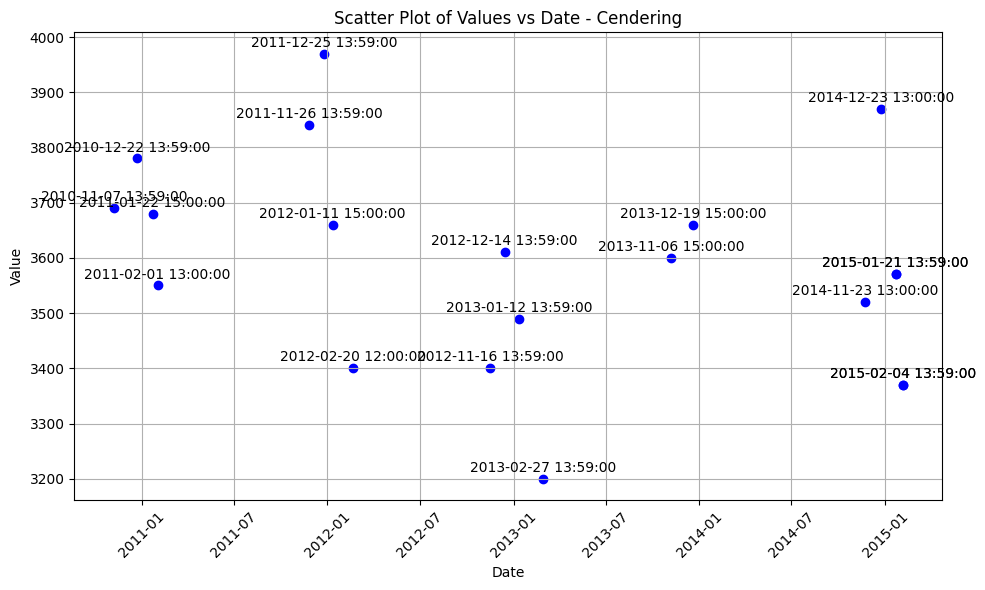

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Your data
data = cendering_max

# Extract data
y_data = [item[0] for item in data]
x_data = [item[1][0] for item in data]

# Convert datetime64 to datetime objects for better plotting
x_data = [np.datetime64(dt).astype('datetime64[m]').tolist() for dt in x_data]

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue')

# Adding labels next to each point
for i, txt in enumerate(x_data):
    plt.annotate(str(txt), (x_data[i], y_data[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Formatting the plot
plt.title('Scatter Plot of Values vs Date - Cendering')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)

# Formatting x-axis to handle date better
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.tight_layout()
plt.show()


stuff for kuantan

In [38]:
kuantan_hourly=xr.open_dataset('h322a.nc')

In [39]:
data = kuantan_hourly['sea_level']
(data.size-int(data.count()))/data.size*100

1.3495079584996919

In [40]:
kuantan_NJDF_hourly={'2014_15':{'NOV_2014':kuantan_hourly.sel(time=slice("2014-11-01T00:00:00.000000000","2014-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2014':kuantan_hourly.sel(time=slice("2014-12-01T00:00:00.000000000","2014-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2015':kuantan_hourly.sel(time=slice("2015-01-01T00:00:00.000000000","2015-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2015':kuantan_hourly.sel(time=slice("2015-02-01T00:00:00.000000000","2015-02-28T22:59:59.971200000"))['sea_level']}, 
               '2013_14':{'NOV_2013':kuantan_hourly.sel(time=slice("2013-11-01T00:00:00.000000000","2013-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2013':kuantan_hourly.sel(time=slice("2013-12-01T00:00:00.000000000","2013-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2014':kuantan_hourly.sel(time=slice("2015-01-01T00:00:00.000000000","2015-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2014':kuantan_hourly.sel(time=slice("2015-02-01T00:00:00.000000000","2015-02-28T22:59:59.971200000"))['sea_level']},
               '2012_13':{'NOV_2012':kuantan_hourly.sel(time=slice("2012-11-01T00:00:00.000000000","2012-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2012':kuantan_hourly.sel(time=slice("2012-12-01T00:00:00.000000000","2012-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2013':kuantan_hourly.sel(time=slice("2013-01-01T00:00:00.000000000","2013-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2013':kuantan_hourly.sel(time=slice("2013-02-01T00:00:00.000000000","2013-02-28T22:59:59.971200000"))['sea_level']},
               '2011_12':{'NOV_2011':kuantan_hourly.sel(time=slice("2011-11-01T00:00:00.000000000","2011-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2011':kuantan_hourly.sel(time=slice("2011-12-01T00:00:00.000000000","2011-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2012':kuantan_hourly.sel(time=slice("2012-01-01T00:00:00.000000000","2012-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2012':kuantan_hourly.sel(time=slice("2012-02-01T00:00:00.000000000","2012-02-29T22:59:59.971200000"))['sea_level']},
               '2010_11':{'NOV_2010':kuantan_hourly.sel(time=slice("2010-11-01T00:00:00.000000000","2010-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2010':kuantan_hourly.sel(time=slice("2010-12-01T00:00:00.000000000","2010-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2011':kuantan_hourly.sel(time=slice("2011-01-01T00:00:00.000000000","2011-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2011':kuantan_hourly.sel(time=slice("2011-02-01T00:00:00.000000000","2011-02-28T22:59:59.971200000"))['sea_level']}}

In [41]:
import numpy as np
kuantan_max=[]
for key, values in kuantan_NJDF_hourly.items():
    for key, sub_values in values.items():
        print(f"{key}:{float(sub_values.max())}, \n, {np.array(sub_values.idxmax("time"))}")
        kuantan_max.append([float(sub_values.max()), np.array(sub_values.idxmax("time"))])

NOV_2014:4340.0, 
, ['2014-11-07T13:59:59.971200000']
DEC_2014:4800.0, 
, ['2014-12-22T13:59:59.971200000']
JAN_2015:4550.0, 
, ['2015-01-23T16:00:00.028800000']
FEB_2015:4310.0, 
, ['2015-02-19T13:59:59.971200000']
NOV_2013:4470.0, 
, ['2013-11-05T15:00:00.000000000']
DEC_2013:4730.0, 
, ['2013-12-03T13:59:59.971200000']
JAN_2014:4550.0, 
, ['2015-01-23T16:00:00.028800000']
FEB_2014:4310.0, 
, ['2015-02-19T13:59:59.971200000']
NOV_2012:4640.0, 
, ['2012-11-15T15:00:00.000000000']
DEC_2012:4710.0, 
, ['2012-12-15T15:00:00.000000000']
JAN_2013:4650.0, 
, ['2013-01-14T16:00:00.028800000']
FEB_2013:4410.0, 
, ['2013-02-10T13:59:59.971200000']
NOV_2011:4720.0, 
, ['2011-11-26T15:00:00.000000000']
DEC_2011:4860.0, 
, ['2011-12-24T13:59:59.971200000']
JAN_2012:4520.0, 
, ['2012-01-11T15:00:00.000000000']
FEB_2012:4250.0, 
, ['2012-02-20T13:00:00.028800000']
NOV_2010:4630.0, 
, ['2010-11-08T15:00:00.000000000']
DEC_2010:4630.0, 
, ['2010-12-22T15:00:00.000000000']
JAN_2011:4600.0, 
, ['2011-0

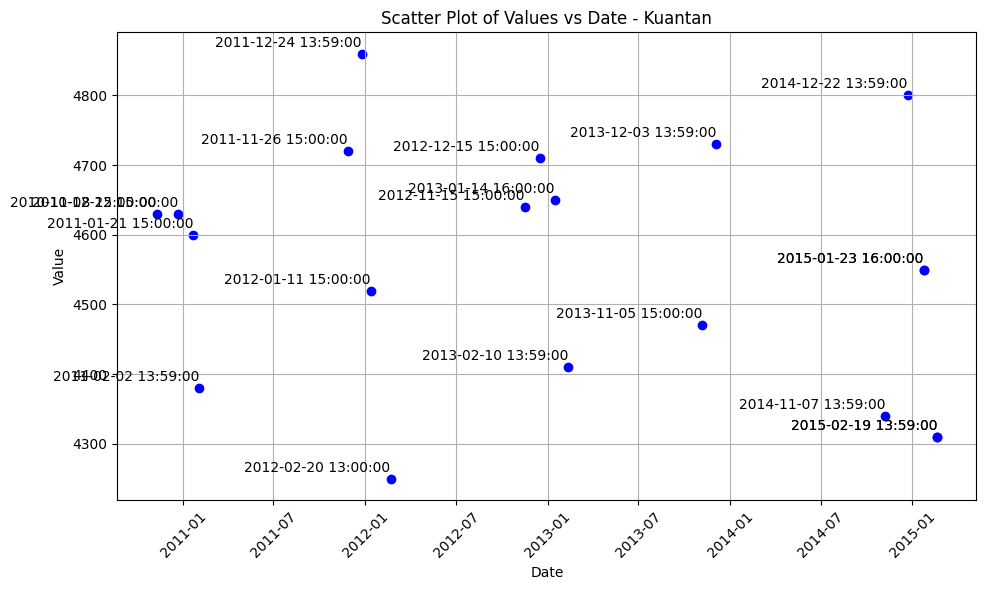

In [42]:
data = kuantan_max

# Extract data
y_data = [item[0] for item in data]
x_data = [item[1][0] for item in data]

# Convert datetime64 to datetime objects for better plotting
x_data = [np.datetime64(dt).astype('datetime64[m]').tolist() for dt in x_data]

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue')

# Adding labels next to each point
for i, txt in enumerate(x_data):
    plt.annotate(str(txt), (x_data[i], y_data[i]), textcoords="offset points", xytext=(0, 5), ha='right')
    
plt.title('Scatter Plot of Values vs Date - Kuantan')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

stuff for tioman

In [43]:
tioman_hourly = xr.open_dataset('h323a.nc')

In [44]:
data = tioman_hourly['sea_level']
(data.size-int(data.count()))/data.size*100

3.4133026428866184

In [45]:
tioman_NJDF_hourly={'2014_15':{'NOV_2014':tioman_hourly.sel(time=slice("2014-11-01T00:00:00.000000000","2014-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2014':tioman_hourly.sel(time=slice("2014-12-01T00:00:00.000000000","2014-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2015':tioman_hourly.sel(time=slice("2015-01-01T00:00:00.000000000","2015-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2015':tioman_hourly.sel(time=slice("2015-02-01T00:00:00.000000000","2015-02-28T22:59:59.971200000"))['sea_level']}, 
               '2013_14':{'NOV_2013':tioman_hourly.sel(time=slice("2013-11-01T00:00:00.000000000","2013-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2013':tioman_hourly.sel(time=slice("2013-12-01T00:00:00.000000000","2013-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2014':tioman_hourly.sel(time=slice("2015-01-01T00:00:00.000000000","2015-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2014':tioman_hourly.sel(time=slice("2015-02-01T00:00:00.000000000","2015-02-28T22:59:59.971200000"))['sea_level']},
               '2012_13':{'NOV_2012':tioman_hourly.sel(time=slice("2012-11-01T00:00:00.000000000","2012-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2012':tioman_hourly.sel(time=slice("2012-12-01T00:00:00.000000000","2012-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2013':tioman_hourly.sel(time=slice("2013-01-01T00:00:00.000000000","2013-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2013':tioman_hourly.sel(time=slice("2013-02-01T00:00:00.000000000","2013-02-28T22:59:59.971200000"))['sea_level']},
               '2011_12':{'NOV_2011':tioman_hourly.sel(time=slice("2011-11-01T00:00:00.000000000","2011-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2011':tioman_hourly.sel(time=slice("2011-12-01T00:00:00.000000000","2011-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2012':tioman_hourly.sel(time=slice("2012-01-01T00:00:00.000000000","2012-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2012':tioman_hourly.sel(time=slice("2012-02-01T00:00:00.000000000","2012-02-29T22:59:59.971200000"))['sea_level']},
               '2010_11':{'NOV_2010':tioman_hourly.sel(time=slice("2010-11-01T00:00:00.000000000","2010-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2010':tioman_hourly.sel(time=slice("2010-12-01T00:00:00.000000000","2010-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2011':tioman_hourly.sel(time=slice("2011-01-01T00:00:00.000000000","2011-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2011':tioman_hourly.sel(time=slice("2011-02-01T00:00:00.000000000","2011-02-28T22:59:59.971200000"))['sea_level']}}

In [46]:
tioman_max=[]
for key, values in tioman_NJDF_hourly.items():
    for key, sub_values in values.items():
        print(f"{key}:{float(sub_values.max())}, \n, {np.array(sub_values.idxmax("time"))}")
        tioman_max.append([float(sub_values.max()), np.array(sub_values.idxmax("time"))])

NOV_2014:4440.0, 
, ['2014-11-23T15:00:00.000000000']
DEC_2014:4730.0, 
, ['2014-12-22T13:59:59.971200000']
JAN_2015:4480.0, 
, ['2015-01-23T16:00:00.028800000']
FEB_2015:4260.0, 
, ['2015-02-18T13:59:59.971200000']
NOV_2013:4450.0, 
, ['2013-11-05T15:00:00.000000000']
DEC_2013:4660.0, 
, ['2013-12-05T16:00:00.028800000']
JAN_2014:4480.0, 
, ['2015-01-23T16:00:00.028800000']
FEB_2014:4260.0, 
, ['2015-02-18T13:59:59.971200000']
NOV_2012:4570.0, 
, ['2012-11-16T16:00:00.028800000']
DEC_2012:4650.0, 
, ['2012-12-15T16:00:00.028800000']
JAN_2013:4040.0, 
, ['2013-01-30T16:00:00.028800000']
FEB_2013:4340.0, 
, ['2013-02-09T13:59:59.971200000']
NOV_2011:4650.0, 
, ['2011-11-26T15:00:00.000000000']
DEC_2011:4810.0, 
, ['2011-12-24T13:59:59.971200000']
JAN_2012:4430.0, 
, ['2012-01-11T16:00:00.028800000']
FEB_2012:4190.0, 
, ['2012-02-21T13:59:59.971200000']
NOV_2010:4600.0, 
, ['2010-11-06T13:59:59.971200000']
DEC_2010:4540.0, 
, ['2010-12-07T16:00:00.028800000']
JAN_2011:4500.0, 
, ['2011-0

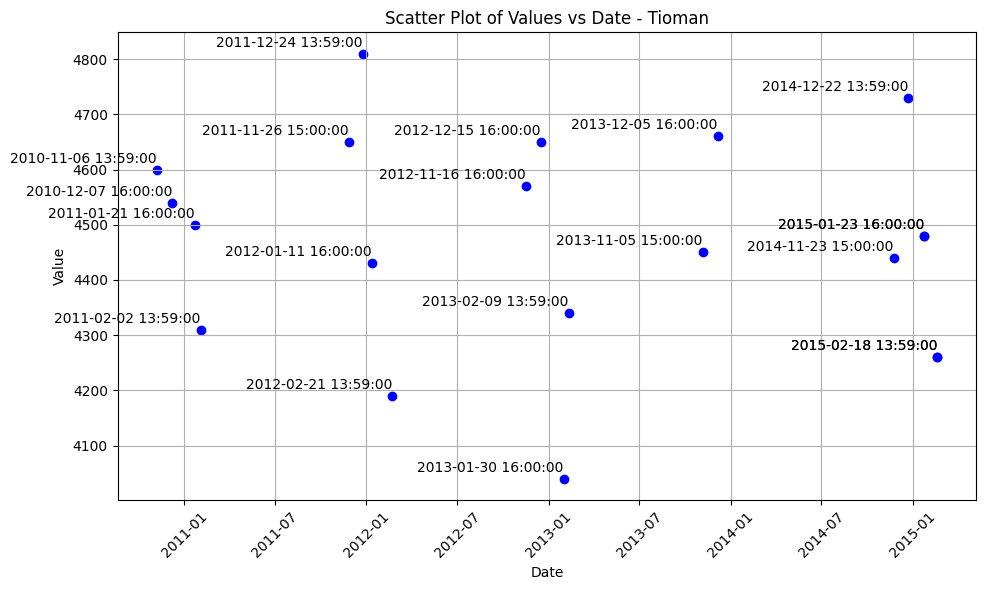

In [47]:
data = tioman_max

# Extract data
y_data = [item[0] for item in data]
x_data = [item[1][0] for item in data]

# Convert datetime64 to datetime objects for better plotting
x_data = [np.datetime64(dt).astype('datetime64[m]').tolist() for dt in x_data]

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue')

# Adding labels next to each point
for i, txt in enumerate(x_data):
    plt.annotate(str(txt), (x_data[i], y_data[i]), textcoords="offset points", xytext=(0, 5), ha='right')
    
plt.title('Scatter Plot of Values vs Date - Tioman')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

stuff for johor baharu (data till 2013)

In [48]:
jb_hourly = xr.open_dataset('h321a.nc')
jb_daily = xr.open_dataset('d321a.nc')

In [49]:
data = jb_hourly['sea_level']
(data.size-int(data.count()))/data.size*100

5.189542682232131

In [50]:
data = jb_daily['sea_level']
(data.size-int(data.count()))/data.size*100

5.441618813234892

In [51]:
jb_NJDF_hourly={'2012_13':{'NOV_2012':jb_hourly.sel(time=slice("2012-11-01T00:00:00.000000000","2012-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2012':jb_hourly.sel(time=slice("2012-12-01T00:00:00.000000000","2012-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2013':jb_hourly.sel(time=slice("2013-01-01T00:00:00.000000000","2013-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2013':jb_hourly.sel(time=slice("2013-02-01T00:00:00.000000000","2013-02-28T22:59:59.971200000"))['sea_level']}, 
               '2011_12':{'NOV_2011':jb_hourly.sel(time=slice("2011-11-01T00:00:00.000000000","2011-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2011':jb_hourly.sel(time=slice("2011-12-01T00:00:00.000000000","2011-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2012':jb_hourly.sel(time=slice("2012-01-01T00:00:00.000000000","2012-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2012':jb_hourly.sel(time=slice("2012-02-01T00:00:00.000000000","2012-02-29T22:59:59.971200000"))['sea_level']},
               '2010_11':{'NOV_2010':jb_hourly.sel(time=slice("2010-11-01T00:00:00.000000000","2010-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2010':jb_hourly.sel(time=slice("2010-12-01T00:00:00.000000000","2010-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2011':jb_hourly.sel(time=slice("2011-01-01T00:00:00.000000000","2011-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2011':jb_hourly.sel(time=slice("2011-02-01T00:00:00.000000000","2011-02-28T22:59:59.971200000"))['sea_level']},
               '2009_10':{'NOV_2009':jb_hourly.sel(time=slice("2009-11-01T00:00:00.000000000","2009-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2009':jb_hourly.sel(time=slice("2009-12-01T00:00:00.000000000","2009-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2010':jb_hourly.sel(time=slice("2010-01-01T00:00:00.000000000","2010-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2010':jb_hourly.sel(time=slice("2010-02-01T00:00:00.000000000","2010-02-28T22:59:59.971200000"))['sea_level']},
               '2008_09':{'NOV_2008':jb_hourly.sel(time=slice("2008-11-01T00:00:00.000000000","2008-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2008':jb_hourly.sel(time=slice("2008-12-01T00:00:00.000000000","2008-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2009':jb_hourly.sel(time=slice("2009-01-01T00:00:00.000000000","2009-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2009':jb_hourly.sel(time=slice("2009-02-01T00:00:00.000000000","2009-02-28T22:59:59.971200000"))['sea_level']}}

In [52]:
import numpy as np
jb_max=[]
for key, values in jb_NJDF_hourly.items():
    for key, sub_values in values.items():
        print(f"{key}:{float(sub_values.max())}, \n, {np.array(sub_values.idxmax("time"))}")
        jb_max.append([float(sub_values.max()), np.array(sub_values.idxmax("time"))])

NOV_2012:4490.0, 
, ['2012-11-15T16:59:59.971200000']
DEC_2012:4540.0, 
, ['2012-12-15T18:00:00.000000000']
JAN_2013:4580.0, 
, ['2013-01-14T18:00:00.000000000']
FEB_2013:4570.0, 
, ['2013-02-12T04:59:59.971200000']
NOV_2011:4590.0, 
, ['2011-11-25T16:00:00.028800000']
DEC_2011:4740.0, 
, ['2011-12-25T16:59:59.971200000']
JAN_2012:4450.0, 
, ['2012-01-11T18:00:00.000000000']
FEB_2012:4470.0, 
, ['2012-02-10T04:59:59.971200000']
NOV_2010:4590.0, 
, ['2010-11-06T16:00:00.028800000']
DEC_2010:4440.0, 
, ['2010-12-24T04:59:59.971200000']
JAN_2011:4600.0, 
, ['2011-01-22T04:59:59.971200000']
FEB_2011:4660.0, 
, ['2011-02-20T04:59:59.971200000']
NOV_2009:4340.0, 
, ['2009-11-19T04:00:00.028800000']
DEC_2009:4500.0, 
, ['2009-12-04T18:00:00.000000000']
JAN_2010:4420.0, 
, ['2010-01-31T04:00:00.028800000']
FEB_2010:4430.0, 
, ['2010-02-02T06:00:00.000000000']
NOV_2008:4610.0, 
, ['2008-11-13T16:00:00.028800000']
DEC_2008:4520.0, 
, ['2008-12-15T18:00:00.000000000']
JAN_2009:4740.0, 
, ['2009-0

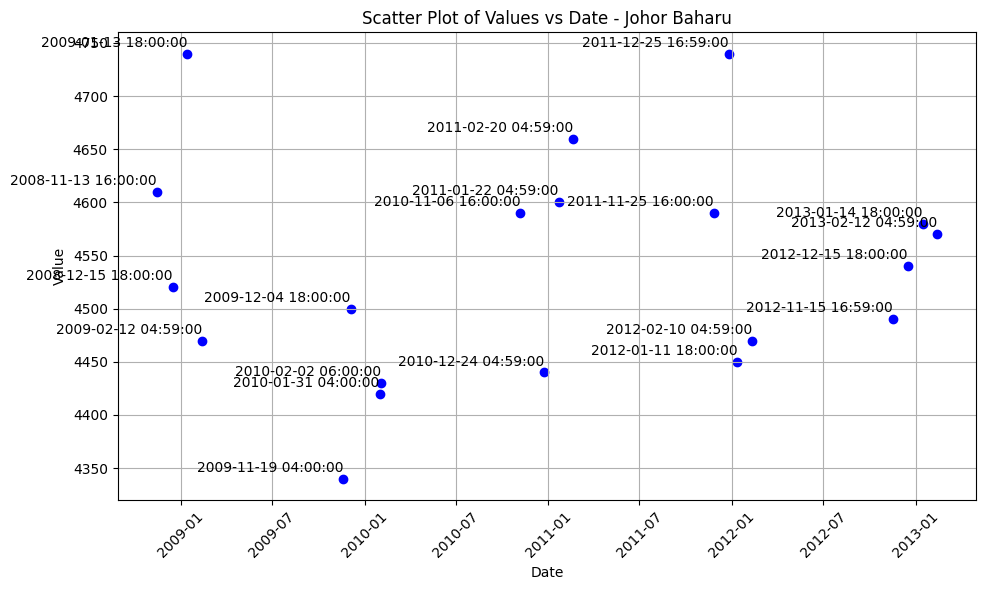

In [53]:
from matplotlib import pyplot as plt
data = jb_max

# Extract data
y_data = [item[0] for item in data]
x_data = [item[1][0] for item in data]

# Convert datetime64 to datetime objects for better plotting
x_data = [np.datetime64(dt).astype('datetime64[m]').tolist() for dt in x_data]

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue')

# Adding labels next to each point
for i, txt in enumerate(x_data):
    plt.annotate(str(txt), (x_data[i], y_data[i]), textcoords="offset points", xytext=(0, 5), ha='right')
    
plt.title('Scatter Plot of Values vs Date - Johor Baharu')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

stuff for sedili (latest till 9/12/2015)

In [54]:
sedili_hourly = xr.open_dataset('h324a.nc')
sedili_daily = xr.open_dataset('d324a.nc')

In [55]:
data = sedili_hourly['sea_level']
(data.size-int(data.count()))/data.size*100

1.8564902331442974

In [56]:
data = sedili_daily['sea_level']
(data.size-int(data.count()))/data.size*100

1.9661593723414312

In [57]:
sedili_NJDF_hourly={'2014_15':{'NOV_2014':sedili_hourly.sel(time=slice("2014-11-01T00:00:00.000000000","2014-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2014':sedili_hourly.sel(time=slice("2014-12-01T00:00:00.000000000","2014-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2015':sedili_hourly.sel(time=slice("2015-01-01T00:00:00.000000000","2015-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2015':sedili_hourly.sel(time=slice("2015-02-01T00:00:00.000000000","2015-02-28T22:59:59.971200000"))['sea_level']}, 
               '2013_14':{'NOV_2013':sedili_hourly.sel(time=slice("2013-11-01T00:00:00.000000000","2013-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2013':sedili_hourly.sel(time=slice("2013-12-01T00:00:00.000000000","2013-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2014':sedili_hourly.sel(time=slice("2015-01-01T00:00:00.000000000","2015-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2014':sedili_hourly.sel(time=slice("2015-02-01T00:00:00.000000000","2015-02-28T22:59:59.971200000"))['sea_level']},
               '2012_13':{'NOV_2012':sedili_hourly.sel(time=slice("2012-11-01T00:00:00.000000000","2012-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2012':sedili_hourly.sel(time=slice("2012-12-01T00:00:00.000000000","2012-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2013':sedili_hourly.sel(time=slice("2013-01-01T00:00:00.000000000","2013-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2013':sedili_hourly.sel(time=slice("2013-02-01T00:00:00.000000000","2013-02-28T22:59:59.971200000"))['sea_level']},
               '2011_12':{'NOV_2011':sedili_hourly.sel(time=slice("2011-11-01T00:00:00.000000000","2011-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2011':sedili_hourly.sel(time=slice("2011-12-01T00:00:00.000000000","2011-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2012':sedili_hourly.sel(time=slice("2012-01-01T00:00:00.000000000","2012-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2012':sedili_hourly.sel(time=slice("2012-02-01T00:00:00.000000000","2012-02-29T22:59:59.971200000"))['sea_level']},
               '2010_11':{'NOV_2010':sedili_hourly.sel(time=slice("2010-11-01T00:00:00.000000000","2010-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2010':sedili_hourly.sel(time=slice("2010-12-01T00:00:00.000000000","2010-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2011':sedili_hourly.sel(time=slice("2011-01-01T00:00:00.000000000","2011-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2011':sedili_hourly.sel(time=slice("2011-02-01T00:00:00.000000000","2011-02-28T22:59:59.971200000"))['sea_level']}}

In [58]:
sedili_max=[]
for key, values in sedili_NJDF_hourly.items():
    for key, sub_values in values.items():
        print(f"{key}:{float(sub_values.max())}, \n, {np.array(sub_values.idxmax("time"))}")
        sedili_max.append([float(sub_values.max()), np.array(sub_values.idxmax("time"))])

NOV_2014:3680.0, 
, ['2014-11-23T15:00:00.000000000']
DEC_2014:3940.0, 
, ['2014-12-22T15:00:00.000000000']
JAN_2015:3740.0, 
, ['2015-01-23T16:59:59.971200000']
FEB_2015:3530.0, 
, ['2015-02-19T15:00:00.000000000']
NOV_2013:3720.0, 
, ['2013-11-05T16:00:00.028800000']
DEC_2013:3940.0, 
, ['2013-12-05T16:59:59.971200000']
JAN_2014:3740.0, 
, ['2015-01-23T16:59:59.971200000']
FEB_2014:3530.0, 
, ['2015-02-19T15:00:00.000000000']
NOV_2012:3800.0, 
, ['2012-11-16T16:59:59.971200000']
DEC_2012:3870.0, 
, ['2012-12-12T13:59:59.971200000']
JAN_2013:3880.0, 
, ['2013-01-11T15:00:00.000000000']
FEB_2013:3600.0, 
, ['2013-02-10T15:00:00.000000000']
NOV_2011:3900.0, 
, ['2011-11-26T16:00:00.028800000']
DEC_2011:4130.0, 
, ['2011-12-24T15:00:00.000000000']
JAN_2012:3780.0, 
, ['2012-01-11T16:00:00.028800000']
FEB_2012:3510.0, 
, ['2012-02-21T15:00:00.000000000']
NOV_2010:3800.0, 
, ['2010-11-06T15:00:00.000000000']
DEC_2010:3800.0, 
, ['2010-12-07T16:59:59.971200000']
JAN_2011:3770.0, 
, ['2011-0

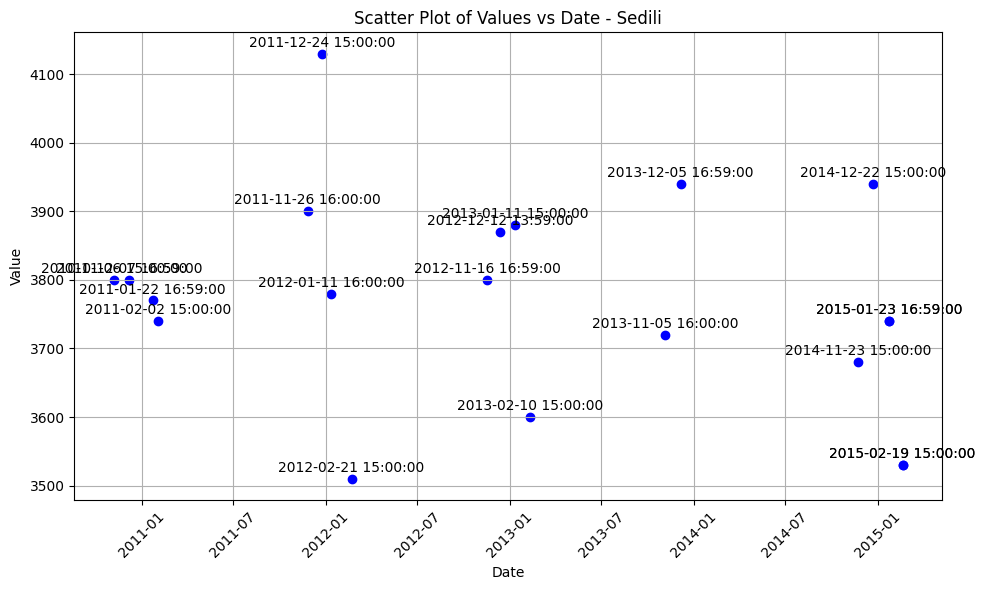

In [59]:
from matplotlib import pyplot as plt
data = sedili_max

# Extract data
y_data = [item[0] for item in data]
x_data = [item[1][0] for item in data]

# Convert datetime64 to datetime objects for better plotting
x_data = [np.datetime64(dt).astype('datetime64[m]').tolist() for dt in x_data]

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue')

# Adding labels next to each point
for i, txt in enumerate(x_data):
    plt.annotate(str(txt), (x_data[i], y_data[i]), textcoords="offset points", xytext=(0, 5), ha='center')
    
plt.title('Scatter Plot of Values vs Date - Sedili')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

stuff for tanjong pagar (latest date:30/12/2018)

In [60]:
tp_hourly=xr.open_dataset('h699a.nc')
tp_daily=xr.open_dataset('d699a.nc')

In [61]:
data = tp_hourly['sea_level']
(data.size-int(data.count()))/data.size*100

3.987836040781205

In [62]:
data = tp_daily['sea_level']
(data.size-int(data.count()))/data.size*100

4.87546369899311

In [63]:
tp_NJDF_hourly={'2014_15':{'NOV_2014':tp_hourly.sel(time=slice("2014-11-01T00:00:00.000000000","2014-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2014':tp_hourly.sel(time=slice("2014-12-01T00:00:00.000000000","2014-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2015':tp_hourly.sel(time=slice("2015-01-01T00:00:00.000000000","2015-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2015':tp_hourly.sel(time=slice("2015-02-01T00:00:00.000000000","2015-02-28T22:59:59.971200000"))['sea_level']}, 
               '2013_14':{'NOV_2013':tp_hourly.sel(time=slice("2013-11-01T00:00:00.000000000","2013-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2013':tp_hourly.sel(time=slice("2013-12-01T00:00:00.000000000","2013-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2014':tp_hourly.sel(time=slice("2015-01-01T00:00:00.000000000","2015-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2014':tp_hourly.sel(time=slice("2015-02-01T00:00:00.000000000","2015-02-28T22:59:59.971200000"))['sea_level']},
               '2012_13':{'NOV_2012':tp_hourly.sel(time=slice("2012-11-01T00:00:00.000000000","2012-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2012':tp_hourly.sel(time=slice("2012-12-01T00:00:00.000000000","2012-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2013':tp_hourly.sel(time=slice("2013-01-01T00:00:00.000000000","2013-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2013':tp_hourly.sel(time=slice("2013-02-01T00:00:00.000000000","2013-02-28T22:59:59.971200000"))['sea_level']},
               '2011_12':{'NOV_2011':tp_hourly.sel(time=slice("2011-11-01T00:00:00.000000000","2011-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2011':tp_hourly.sel(time=slice("2011-12-01T00:00:00.000000000","2011-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2012':tp_hourly.sel(time=slice("2012-01-01T00:00:00.000000000","2012-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2012':tp_hourly.sel(time=slice("2012-02-01T00:00:00.000000000","2012-02-29T22:59:59.971200000"))['sea_level']},
               '2010_11':{'NOV_2010':tp_hourly.sel(time=slice("2010-11-01T00:00:00.000000000","2010-11-30T22:59:59.971200000"))['sea_level'], 
                       'DEC_2010':tp_hourly.sel(time=slice("2010-12-01T00:00:00.000000000","2010-12-31T22:59:59.971200000"))['sea_level'], 
                       'JAN_2011':tp_hourly.sel(time=slice("2011-01-01T00:00:00.000000000","2011-01-31T22:59:59.971200000"))['sea_level'],
                       'FEB_2011':tp_hourly.sel(time=slice("2011-02-01T00:00:00.000000000","2011-02-28T22:59:59.971200000"))['sea_level']}}

In [64]:
tp_max=[]
for key, values in tp_NJDF_hourly.items():
    for key, sub_values in values.items():
        print(f"{key}:{float(sub_values.max())}, \n, {np.array(sub_values.idxmax("time"))}")
        tp_max.append([float(sub_values.max()), np.array(sub_values.idxmax("time"))])

NOV_2014:3080.0, 
, ['2014-11-24T03:00:00.000000000']
DEC_2014:3360.0, 
, ['2014-12-23T03:00:00.000000000']
JAN_2015:3310.0, 
, ['2015-01-23T04:59:59.971200000']
FEB_2015:3160.0, 
, ['2015-02-20T04:00:00.028800000']
NOV_2013:3140.0, 
, ['2013-11-05T03:00:00.000000000']
DEC_2013:3370.0, 
, ['2013-12-06T04:59:59.971200000']
JAN_2014:3310.0, 
, ['2015-01-23T04:59:59.971200000']
FEB_2014:3160.0, 
, ['2015-02-20T04:00:00.028800000']
NOV_2012:3280.0, 
, ['2012-11-16T04:00:00.028800000']
DEC_2012:3290.0, 
, ['2012-12-13T01:59:59.971200000']
JAN_2013:3280.0, 
, ['2013-01-14T04:00:00.028800000']
FEB_2013:3290.0, 
, ['2013-02-12T04:00:00.028800000']
NOV_2011:3250.0, 
, ['2011-11-26T03:00:00.000000000']
DEC_2011:3400.0, 
, ['2011-12-25T03:00:00.000000000']
JAN_2012:3240.0, 
, ['2012-01-12T04:59:59.971200000']
FEB_2012:3170.0, 
, ['2012-02-09T04:00:00.028800000']
NOV_2010:3180.0, 
, ['2010-11-06T01:59:59.971200000']
DEC_2010:3260.0, 
, ['2010-12-08T04:00:00.028800000']
JAN_2011:3370.0, 
, ['2011-0

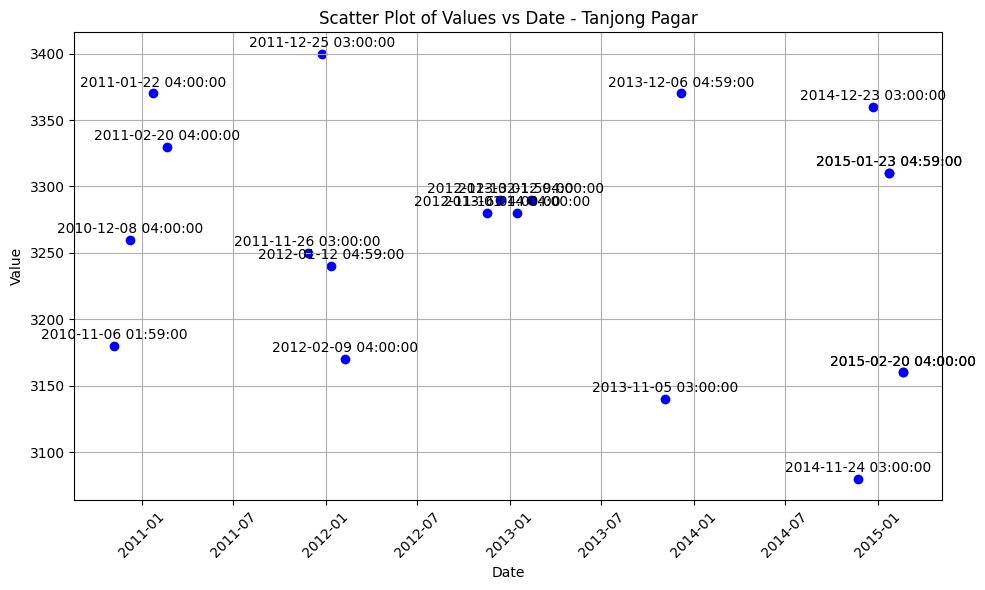

In [65]:
from matplotlib import pyplot as plt
data = tp_max

# Extract data
y_data = [item[0] for item in data]
x_data = [item[1][0] for item in data]

# Convert datetime64 to datetime objects for better plotting
x_data = [np.datetime64(dt).astype('datetime64[m]').tolist() for dt in x_data]

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue')

# Adding labels next to each point
for i, txt in enumerate(x_data):
    plt.annotate(str(txt), (x_data[i], y_data[i]), textcoords="offset points", xytext=(0, 5), ha='center')
    
plt.title('Scatter Plot of Values vs Date - Tanjong Pagar')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

to find common dates because the graphs are a bit messy

In [66]:
locations = [cendering_max, kuantan_max, tioman_max, jb_max, sedili_max, tp_max]
dates={'NOV_2014':[], 'DEC_2014':[], 'JAN_2015':[], 'FEB_2015':[], 
       'NOV_2013':[], 'DEC_2013':[], 'JAN_2014':[], 'FEB_2014':[],
       'NOV_2012':[], 'DEC_2012':[], 'JAN_2013':[], 'FEB_2013':[],
       'NOV_2011':[], 'DEC_2011':[], 'JAN_2012':[], 'FEB_2012':[],
       'NOV_2010':[], 'DEC_2010':[], 'JAN_2011':[], 'FEB_2011':[],}
i=0
for keys, values in dates.items():
    for loc in locations:
        values.append(loc[i][1])
    i+=1


In [67]:
dates

{'NOV_2014': [array(['2014-11-23T13:00:00.028800000'], dtype='datetime64[ns]'),
  array(['2014-11-07T13:59:59.971200000'], dtype='datetime64[ns]'),
  array(['2014-11-23T15:00:00.000000000'], dtype='datetime64[ns]'),
  array(['2012-11-15T16:59:59.971200000'], dtype='datetime64[ns]'),
  array(['2014-11-23T15:00:00.000000000'], dtype='datetime64[ns]'),
  array(['2014-11-24T03:00:00.000000000'], dtype='datetime64[ns]')],
 'DEC_2014': [array(['2014-12-23T13:00:00.028800000'], dtype='datetime64[ns]'),
  array(['2014-12-22T13:59:59.971200000'], dtype='datetime64[ns]'),
  array(['2014-12-22T13:59:59.971200000'], dtype='datetime64[ns]'),
  array(['2012-12-15T18:00:00.000000000'], dtype='datetime64[ns]'),
  array(['2014-12-22T15:00:00.000000000'], dtype='datetime64[ns]'),
  array(['2014-12-23T03:00:00.000000000'], dtype='datetime64[ns]')],
 'JAN_2015': [array(['2015-01-21T13:59:59.971200000'], dtype='datetime64[ns]'),
  array(['2015-01-23T16:00:00.028800000'], dtype='datetime64[ns]'),
  array(['

time series plots

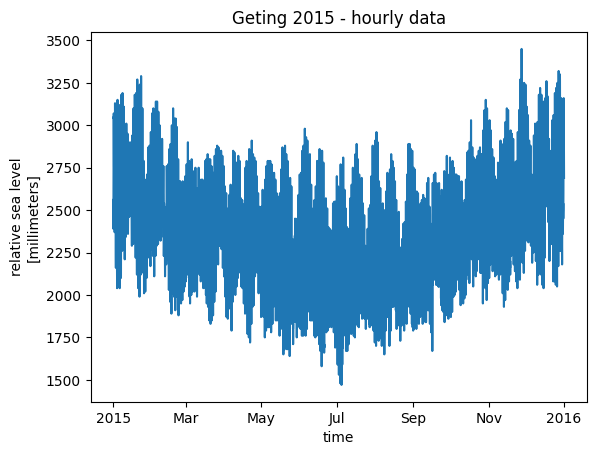

In [68]:
geting_hourly.sel(time=slice("2015-01-01T00:00:00.000000000","2015-12-31T22:59:59.971200000"))['sea_level'].plot()
plt.title("Geting 2015 - hourly data")
plt.show()

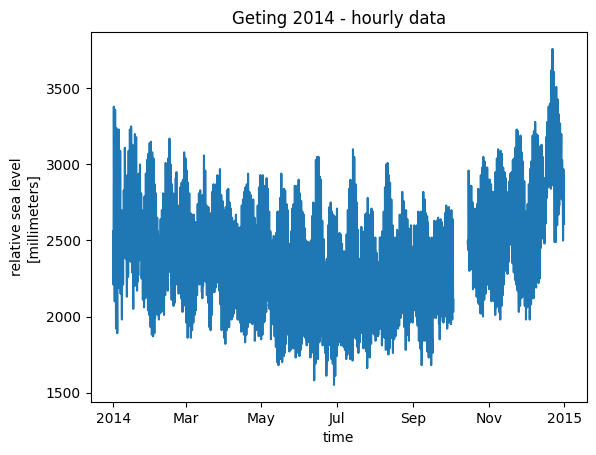

In [69]:
geting_hourly.sel(time=slice("2014-01-01T00:00:00.000000000","2014-12-31T22:59:59.971200000"))['sea_level'].plot()
plt.title("Geting 2014 - hourly data")
plt.show()

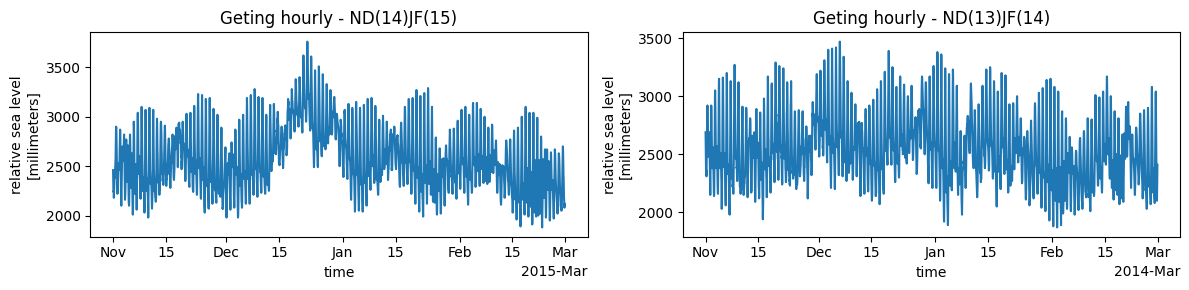

In [70]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 3))
geting_hourly.sel(time=slice("2014-11-01T00:00:00.000000000","2015-02-28T22:59:59.971200000"))['sea_level'].plot(ax=axs[0])
geting_hourly.sel(time=slice("2013-11-01T00:00:00.000000000","2014-02-28T22:59:59.971200000"))['sea_level'].plot(ax=axs[1])
axs[0].set_title("Geting hourly - ND(14)JF(15)")
axs[1].set_title("Geting hourly - ND(13)JF(14)")
plt.tight_layout()
plt.show()


In [71]:
def time_series_graphs(data, name):
    fig, axs = plt.subplots(ncols=2, figsize=(12, 3))
    data.sel(time=slice("2014-11-01T00:00:00.000000000","2015-02-28T22:59:59.971200000"))['sea_level'].plot(ax=axs[0])
    data.sel(time=slice("2013-11-01T00:00:00.000000000","2014-02-28T22:59:59.971200000"))['sea_level'].plot(ax=axs[1])
    axs[0].set_title(f"{name} hourly - ND(14)JF(15)")
    axs[1].set_title(f"{name} hourly - ND(13)JF(14)")
    plt.tight_layout()
    plt.show()

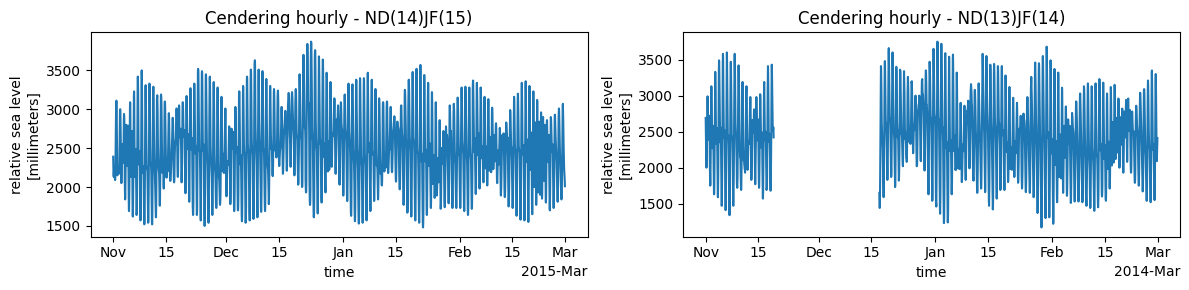

In [72]:
time_series_graphs(cendering_hourly, "Cendering")

In [73]:
langkawi_hourly.isel(time=slice(1000, 1100))['sea_level']

<xarray.DataArray 'sea_level' (record_id: 1, time: 100)> Size: 400B
array([[1130., 1630., 2160., 2600., 2870., 2830., 2520., 2070., 1550., 1150.,
         960., 1050., 1370., 1910., 2500., 3050., 3390., 3410., 3060., 2470.,
        1760., 1150.,  760.,  650.,  790., 1190., 1750., 2290., 2730., 2930.,
        2840., 2440., 1910., 1400., 1040.,  960., 1080., 1490., 2050., 2680.,
        3200., 3490., 3380., 2950., 2300., 1580., 1000.,  660.,  620.,  870.,
        1330., 1930., 2470., 2870., 2980., 2770., 2320., 1780., 1310., 1030.,
        1000., 1250., 1740., 2350., 2930., 3380., 3510., 3270., 2750., 2050.,
        1360.,  860.,  630.,  690., 1020., 1560., 2160., 2640., 2950., 2910.,
        2600., 2130., 1630., 1230., 1030., 1100., 1430., 1940., 2520., 3060.,
        3390., 3370., 3040., 2440., 1750., 1170.,  810.,  770.,  970., 1370.]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 800B 1986-01-10 ... 1986-01-14T03:00:00
  * record_id  (record_id) int16 2B 1421
Attributes:
    long_name:  relative sea level
    units:      millimeters
    source:     in situ tide gauge water level observations
    platform:   station_name, station_country, station_country_code, uhslc_id...

In [74]:
daily_max = geting_hourly.sel(time=slice("2014-11-01T00:00:00.000000000","2014-11-01T22:59:59.971200000"))['sea_level'].max()
daily_max

<xarray.DataArray 'sea_level' ()> Size: 4B
array(2900., dtype=float32)

In [75]:
def daily_max(data, day):
    max = data.sel(time=slice(f"2014-11-{day}T00:00:00.000000000",f"2014-11-{day}T22:59:59.971200000"))['sea_level'].max()
    return max

In [76]:
for i in range(1,30):
    print(daily_max(geting_hourly, i))

<xarray.DataArray 'sea_level' ()> Size: 4B
array(2900., dtype=float32)
<xarray.DataArray 'sea_level' ()> Size: 4B
array(2870., dtype=float32)
<xarray.DataArray 'sea_level' ()> Size: 4B
array(2820., dtype=float32)
<xarray.DataArray 'sea_level' ()> Size: 4B
array(2770., dtype=float32)
<xarray.DataArray 'sea_level' ()> Size: 4B
array(2820., dtype=float32)
<xarray.DataArray 'sea_level' ()> Size: 4B
array(2950., dtype=float32)
<xarray.DataArray 'sea_level' ()> Size: 4B
array(3040., dtype=float32)
<xarray.DataArray 'sea_level' ()> Size: 4B
array(3100., dtype=float32)
<xarray.DataArray 'sea_level' ()> Size: 4B
array(3070., dtype=float32)
<xarray.DataArray 'sea_level' ()> Size: 4B
array(3090., dtype=float32)
<xarray.DataArray 'sea_level' ()> Size: 4B
array(3070., dtype=float32)
<xarray.DataArray 'sea_level' ()> Size: 4B
array(2980., dtype=float32)
<xarray.DataArray 'sea_level' ()> Size: 4B
array(2950., dtype=float32)
<xarray.DataArray 'sea_level' ()> Size: 4B
array(2910., dtype=float32)
<xarra

In [77]:
cs_test=cendering_hourly.resample(time="1D").max()

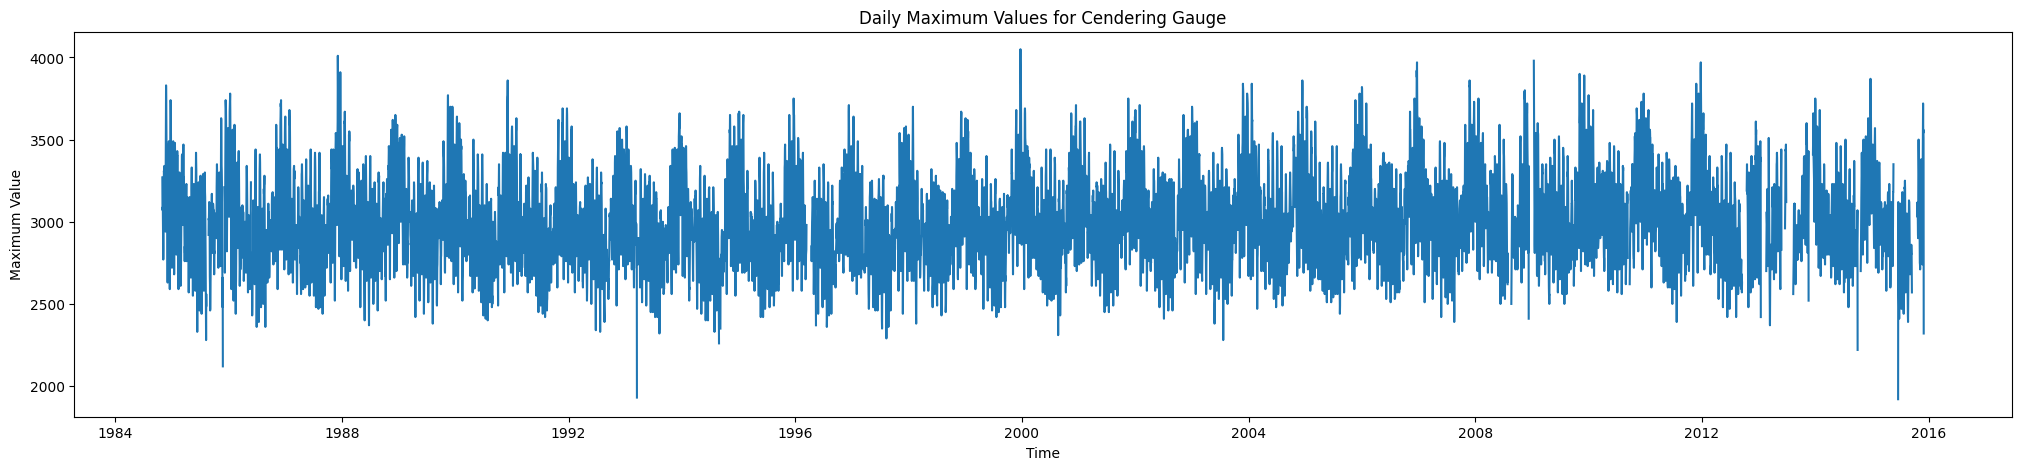

In [78]:
cs_test['sea_level'].plot(figsize=(25, 5))
plt.title("Daily Maximum Values for Cendering Gauge")
plt.xlabel("Time")
plt.ylabel("Maximum Value")
plt.show()


resampled datasets

In [79]:
#locations = [cendering_max, kuantan_max, tioman_max, jb_max, sedili_max, tp_max]
kuantan_resampled = kuantan_hourly.resample(time="1D").max()
tioman_resampled = tioman_hourly.resample(time="1D").max()
jb_resampled = jb_hourly.resample(time="1D").max()
sedili_resampled = sedili_hourly.resample(time="1D").max()
tp_resampled = tp_hourly.resample(time="1D").max()

In [80]:
# Subset data for the desired months
subset = kuantan_resampled.sel(time=kuantan_resampled['time'].dt.month.isin([1, 2, 11, 12]))


In [81]:
def time_series_long_time(data, name):
    data['sea_level'].plot(figsize=(25, 5))
    plt.title(f"Daily Maximum Values for {name} Gauge")
    plt.xlabel("Time")
    plt.ylabel("Maximum Value")
    plt.show()  

In [82]:
print(f"Time:{subset['time']}, Sea-level:{subset['sea_level']}")

Time:<xarray.DataArray 'time' (time: 3859)> Size: 31kB
array(['1983-12-21T00:00:00.000000000', '1983-12-22T00:00:00.000000000',
       '1983-12-23T00:00:00.000000000', ..., '2015-12-29T00:00:00.000000000',
       '2015-12-30T00:00:00.000000000', '2015-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 31kB 1983-12-21 1983-12-22 ... 2015-12-31, Sea-level:<xarray.DataArray 'sea_level' (time: 3859, record_id: 1)> Size: 15kB
array([[4530.],
       [4580.],
       [4540.],
       ...,
       [4300.],
       [4160.],
       [4160.]], dtype=float32)
Coordinates:
  * record_id  (record_id) int16 2B 3221
  * time       (time) datetime64[ns] 31kB 1983-12-21 1983-12-22 ... 2015-12-31
Attributes:
    long_name:  relative sea level
    units:      millimeters
    source:     in situ tide gauge water level observations
    platform:   station_name, station_country, station_country_code, uhslc_id...


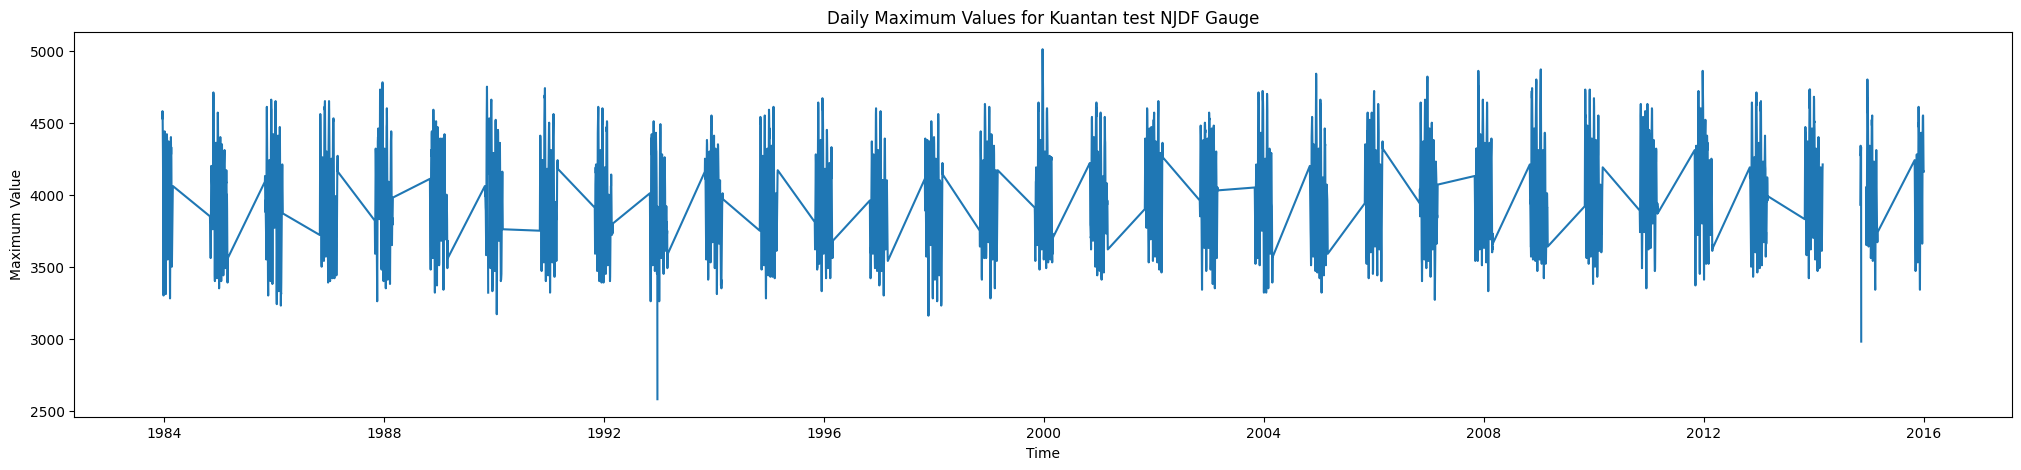

In [83]:
time_series_long_time(subset, "Kuantan test NJDF")

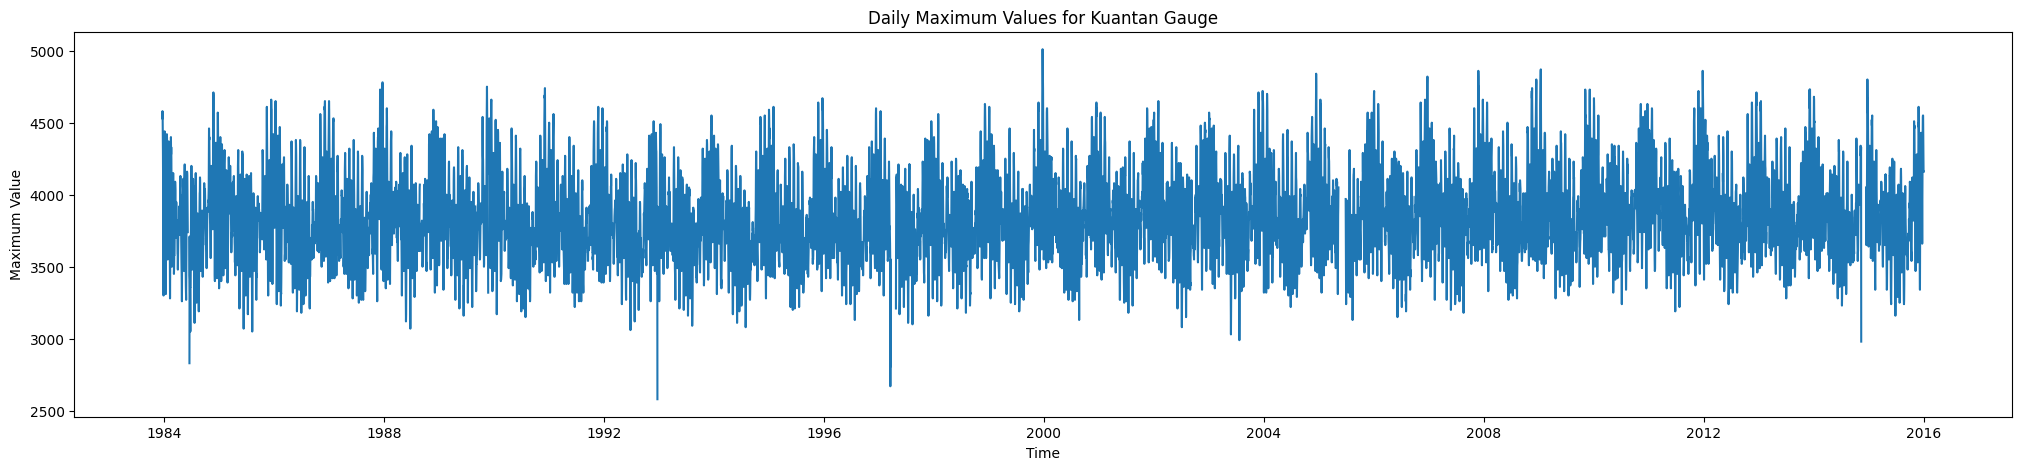

In [84]:
time_series_long_time(kuantan_resampled, "Kuantan")

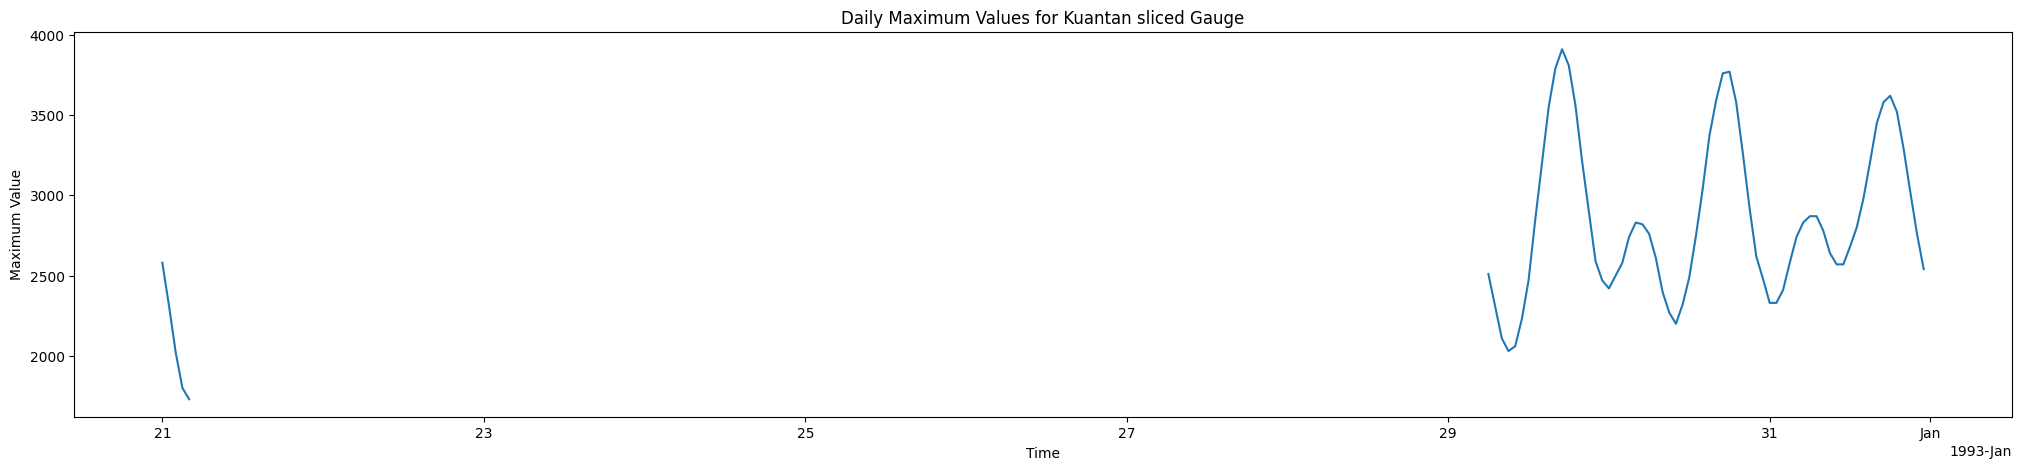

In [85]:
time_series_long_time(kuantan_hourly.sel(time=slice("1992-12-21", "1992-12-31")), "Kuantan sliced")

In [86]:
kuantan_hourly.sel(time=slice("1992-12-21", "1992-12-22"))['sea_level'].values

array([[2580., 2310., 2020., 1800., 1730.,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan]], dtype=float32)

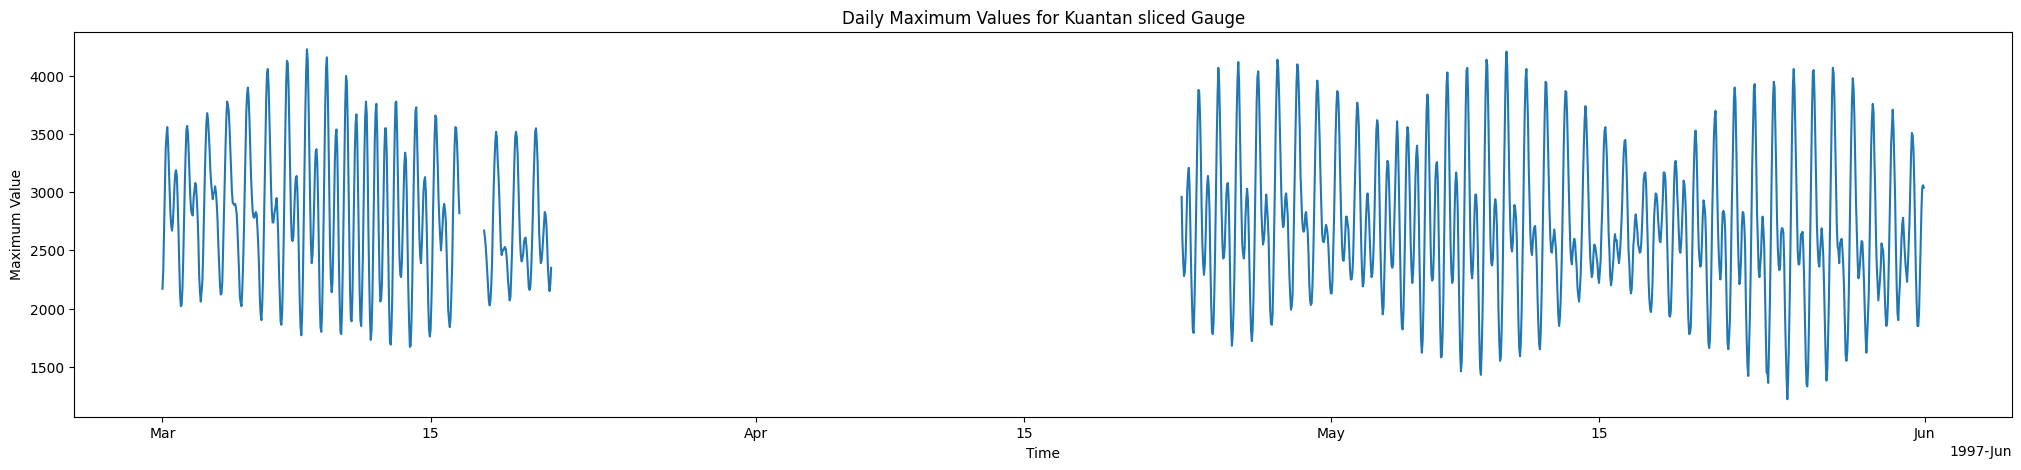

In [87]:
time_series_long_time(kuantan_hourly.sel(time=slice("1997-03-01", "1997-05-31")), "Kuantan sliced")

In [88]:
kuantan_hourly.sel(time=slice("1997-03-21", "1997-03-22"))['sea_level'].values

array([[2810., 2730., 2560., 2350., 2230., 2150., 2210., 2350.,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan]], dtype=float32)

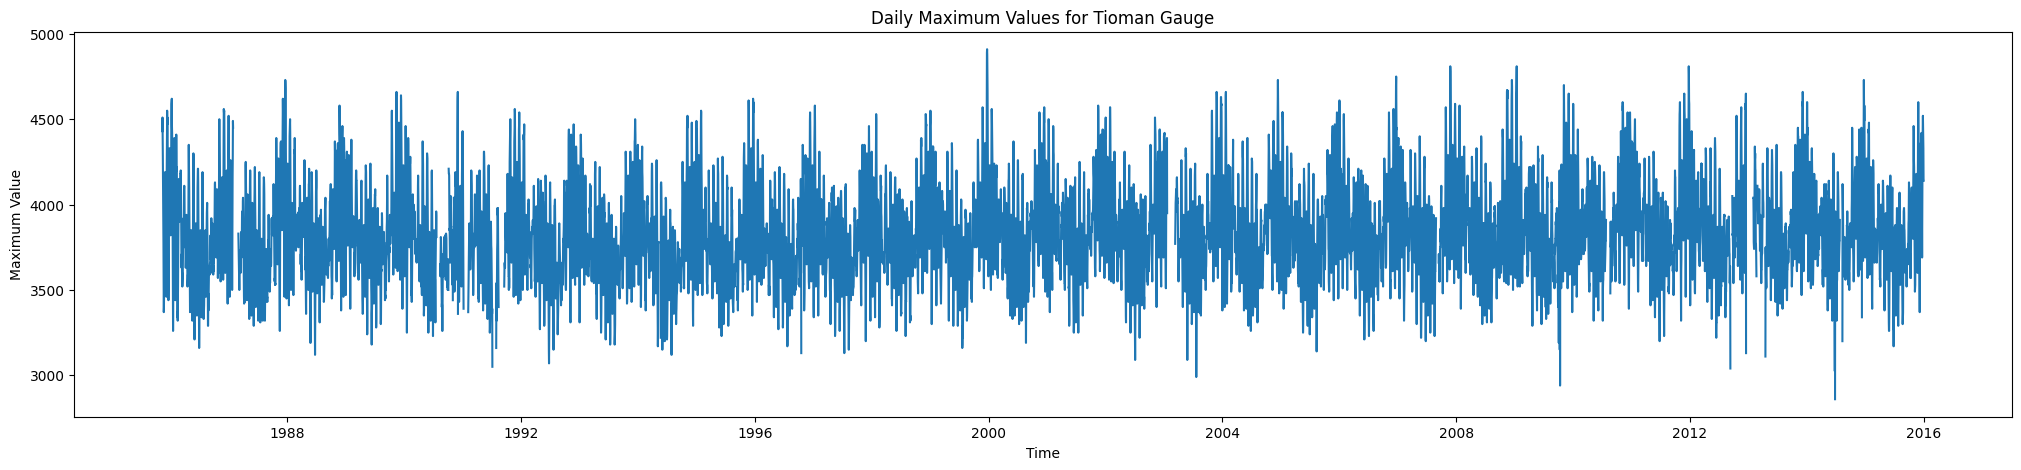

In [89]:
time_series_long_time(tioman_resampled, "Tioman")

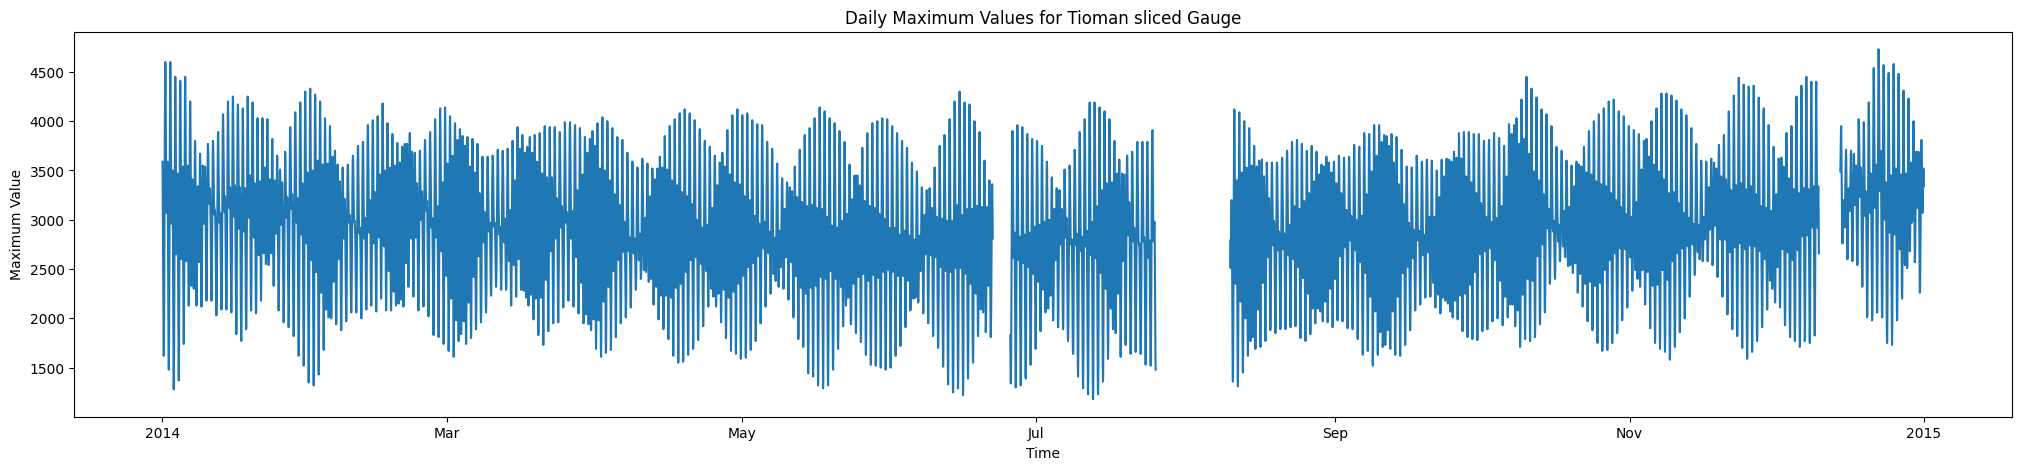

In [90]:
time_series_long_time(tioman_hourly.sel(time=slice("2014-01-01", "2014-12-31")), "Tioman sliced")

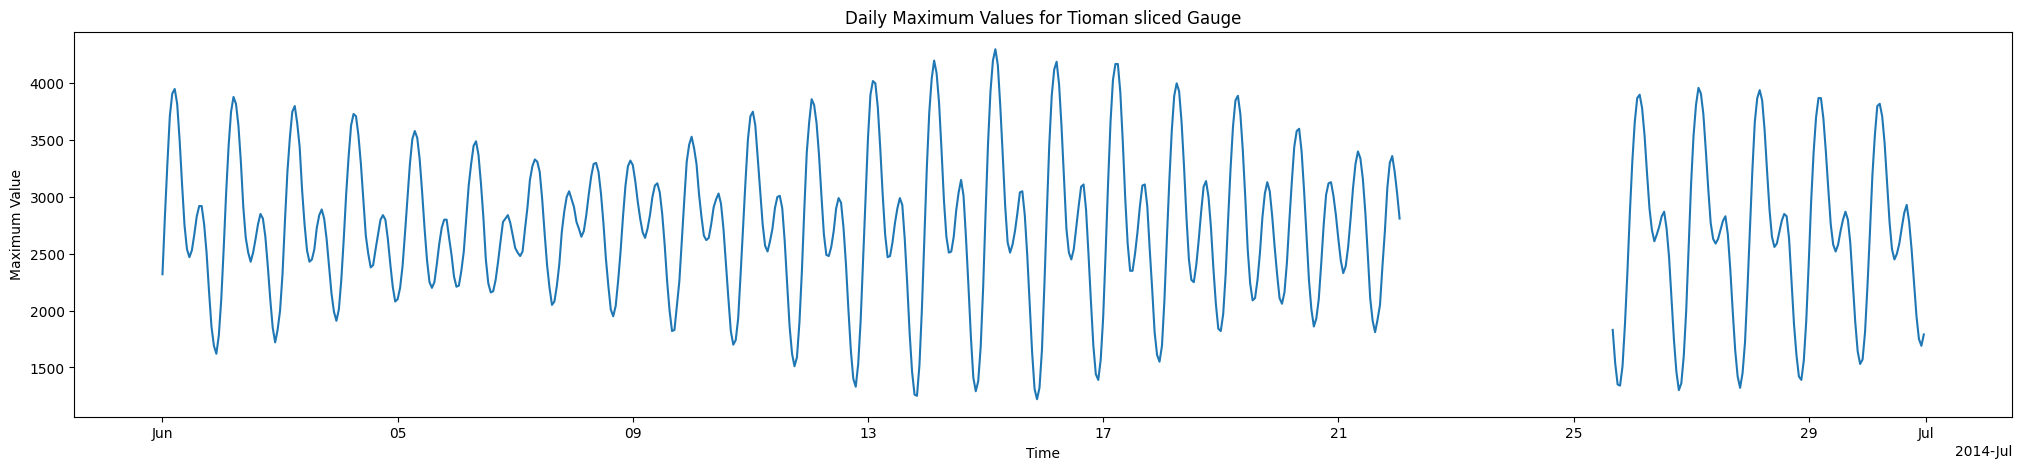

In [91]:
time_series_long_time(tioman_hourly.sel(time=slice("2014-06-01", "2014-06-30")), "Tioman sliced")

In [92]:
tioman_hourly.sel(time=slice("2014-12-10T00:00:00.000000000", "2014-12-10T22:59:59.971200000"))['sea_level']

<xarray.DataArray 'sea_level' (record_id: 1, time: 24)> Size: 96B
array([[3190., 3270., 3340., 3250., 3020., 2660.,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 192B 2014-12-10 ... 2014-12-10T22:59:59....
  * record_id  (record_id) int16 2B 3231
Attributes:
    long_name:  relative sea level
    units:      millimeters
    source:     in situ tide gauge water level observations
    platform:   station_name, station_country, station_country_code, uhslc_id...

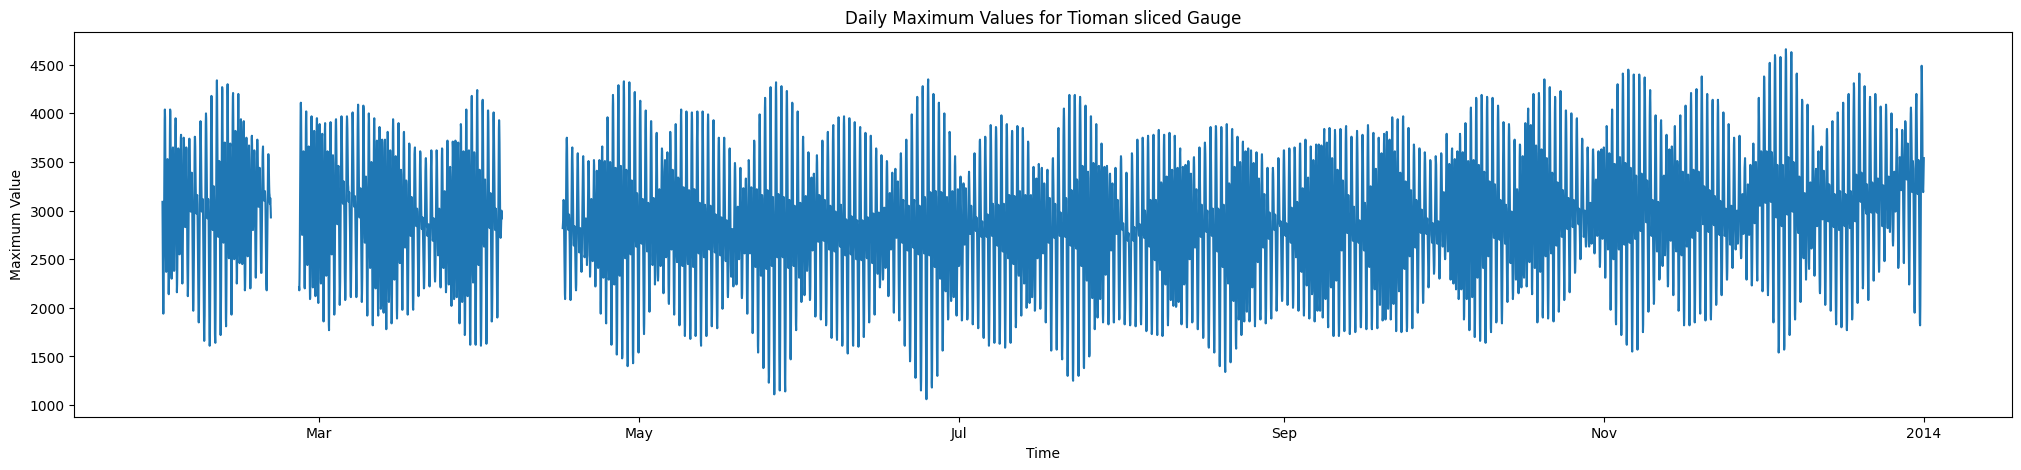

In [93]:
time_series_long_time(tioman_hourly.sel(time=slice("2013-01-01", "2013-12-31")), "Tioman sliced")

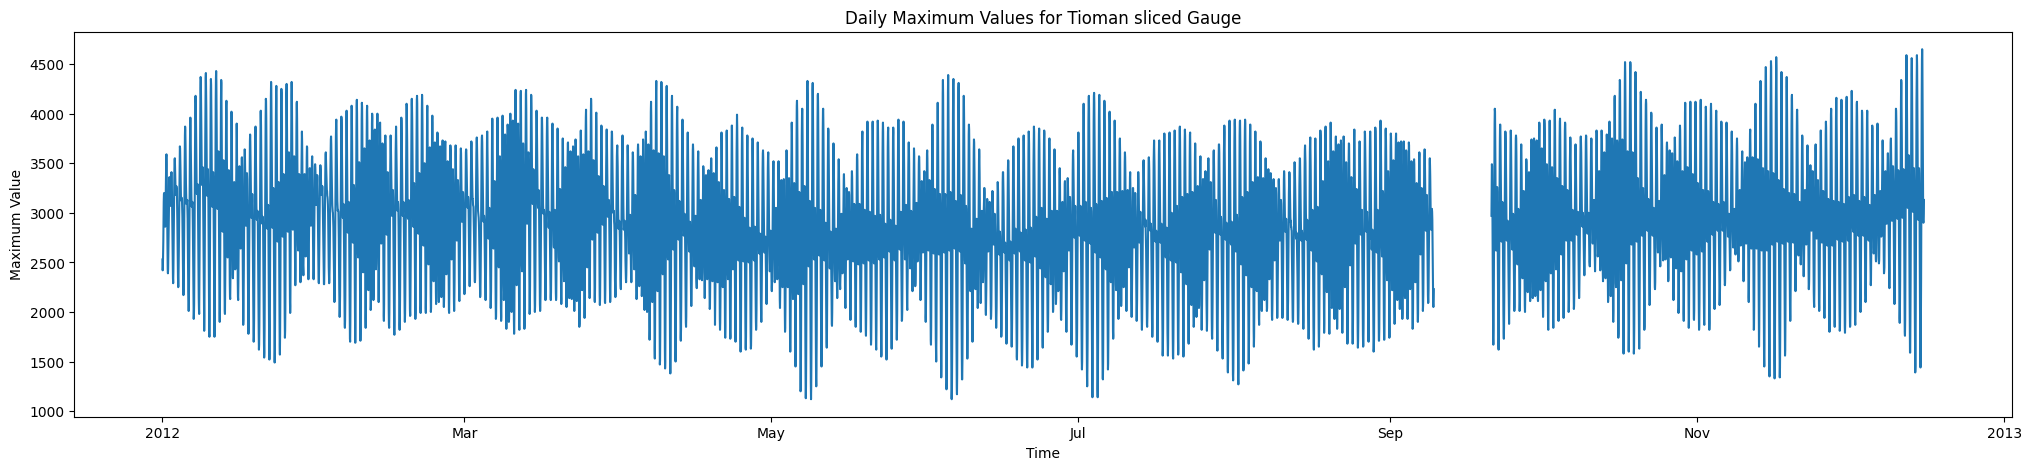

In [94]:
time_series_long_time(tioman_hourly.sel(time=slice("2012-01-01", "2012-12-31")), "Tioman sliced")

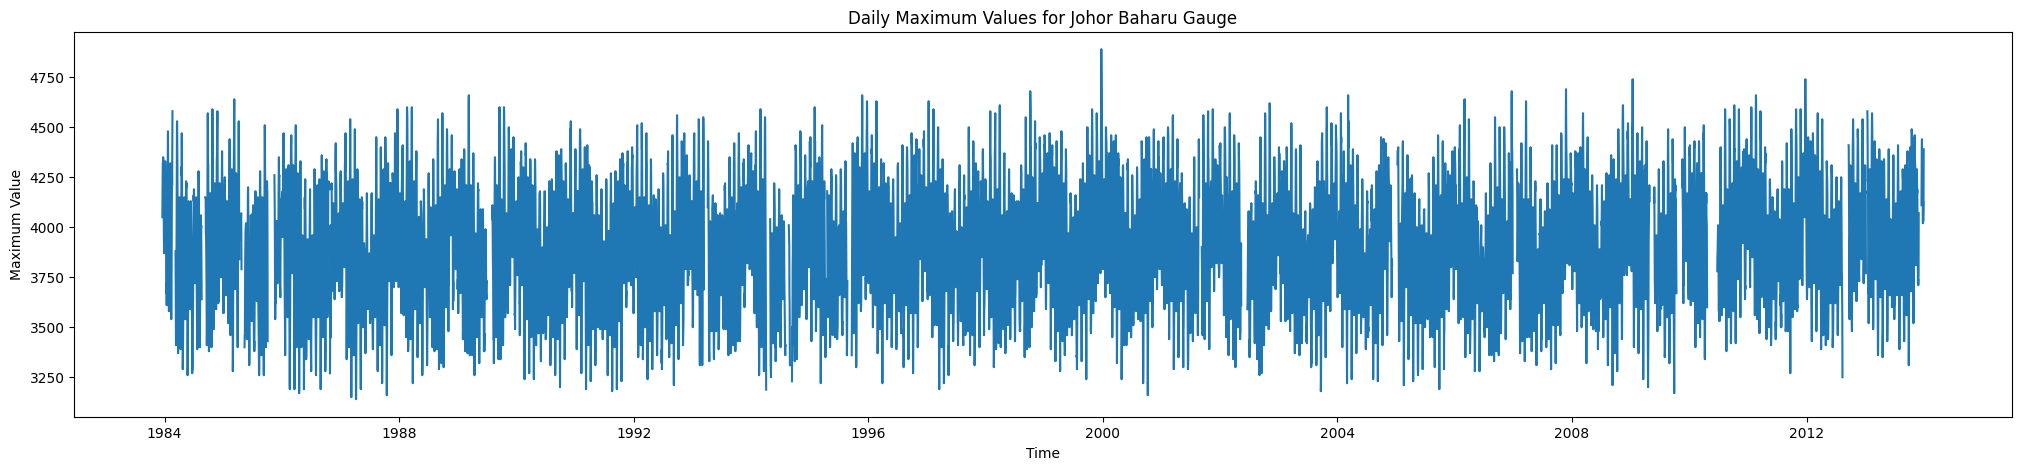

In [95]:
time_series_long_time(jb_resampled, "Johor Baharu")

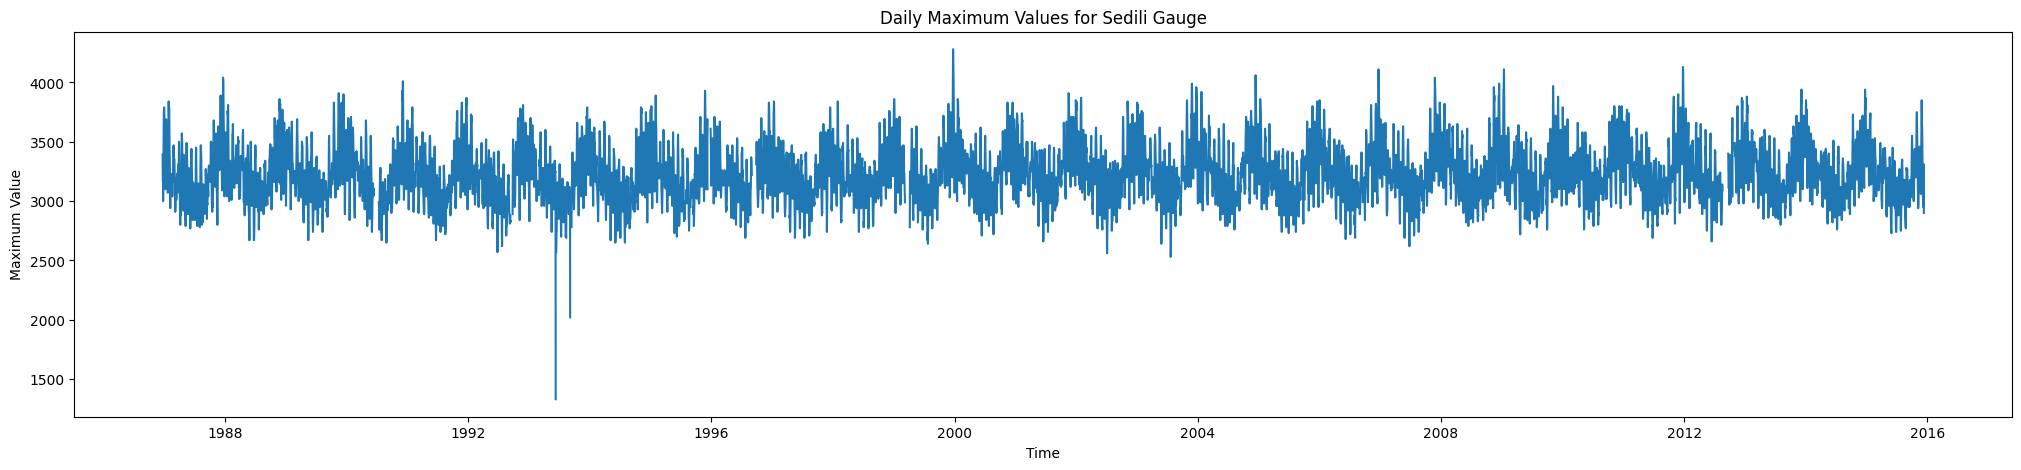

In [96]:
time_series_long_time(sedili_resampled, "Sedili")

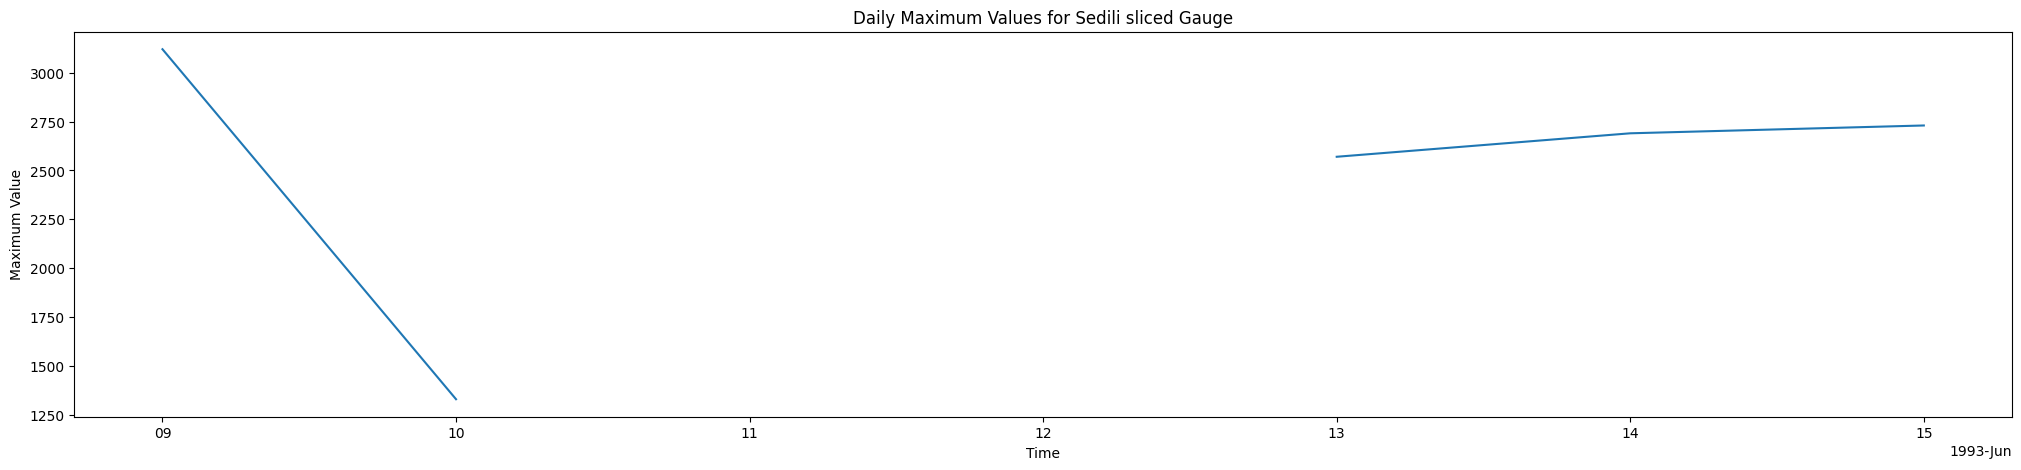

In [97]:
time_series_long_time(sedili_resampled.sel(time=slice("1993-06-09T00:00:00.000000000", "1993-06-15T22:59:59.971200000")), "Sedili sliced")

In [98]:
sedili_hourly.sel(time=slice("1993-06-10T00:00:00.000000000", "1993-06-10T22:59:59.971200000"))['sea_level']

<xarray.DataArray 'sea_level' (record_id: 1, time: 24)> Size: 96B
array([[1210., 1330.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 192B 1993-06-10 ... 1993-06-10T22:59:59....
  * record_id  (record_id) int16 2B 3241
Attributes:
    long_name:  relative sea level
    units:      millimeters
    source:     in situ tide gauge water level observations
    platform:   station_name, station_country, station_country_code, uhslc_id...

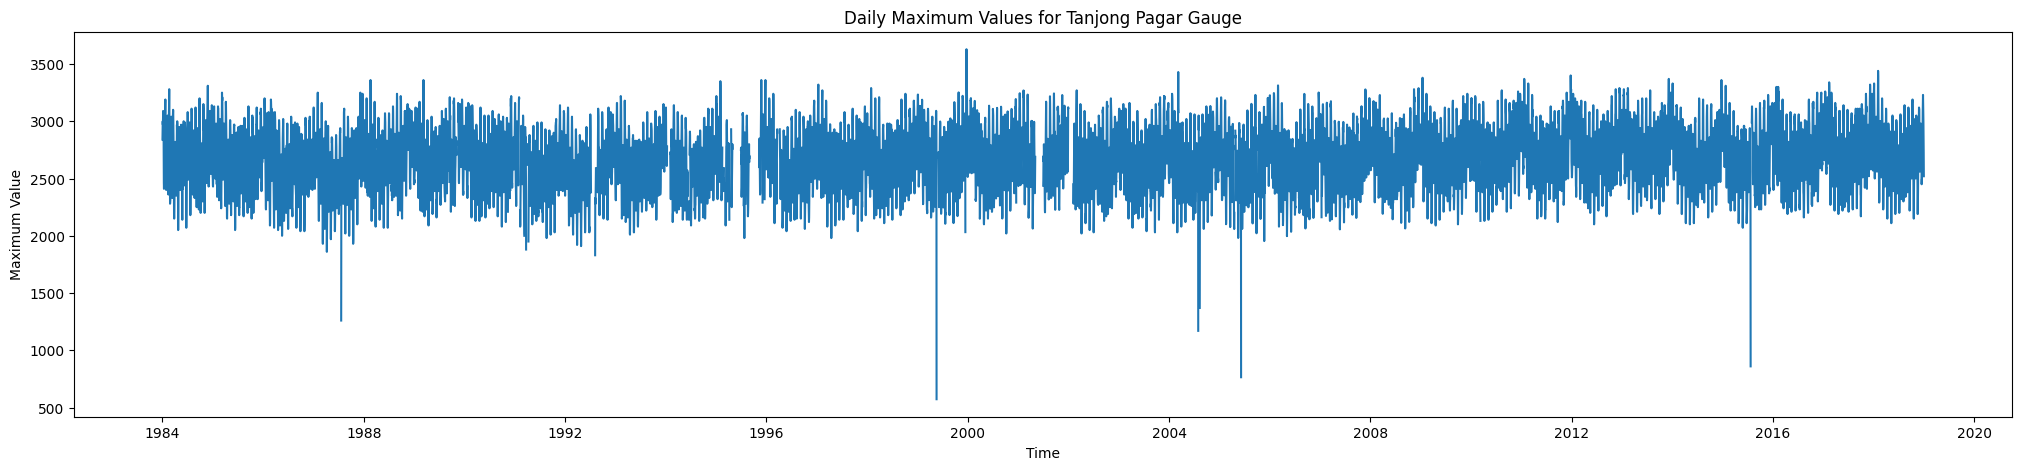

In [99]:
time_series_long_time(tp_resampled, "Tanjong Pagar")

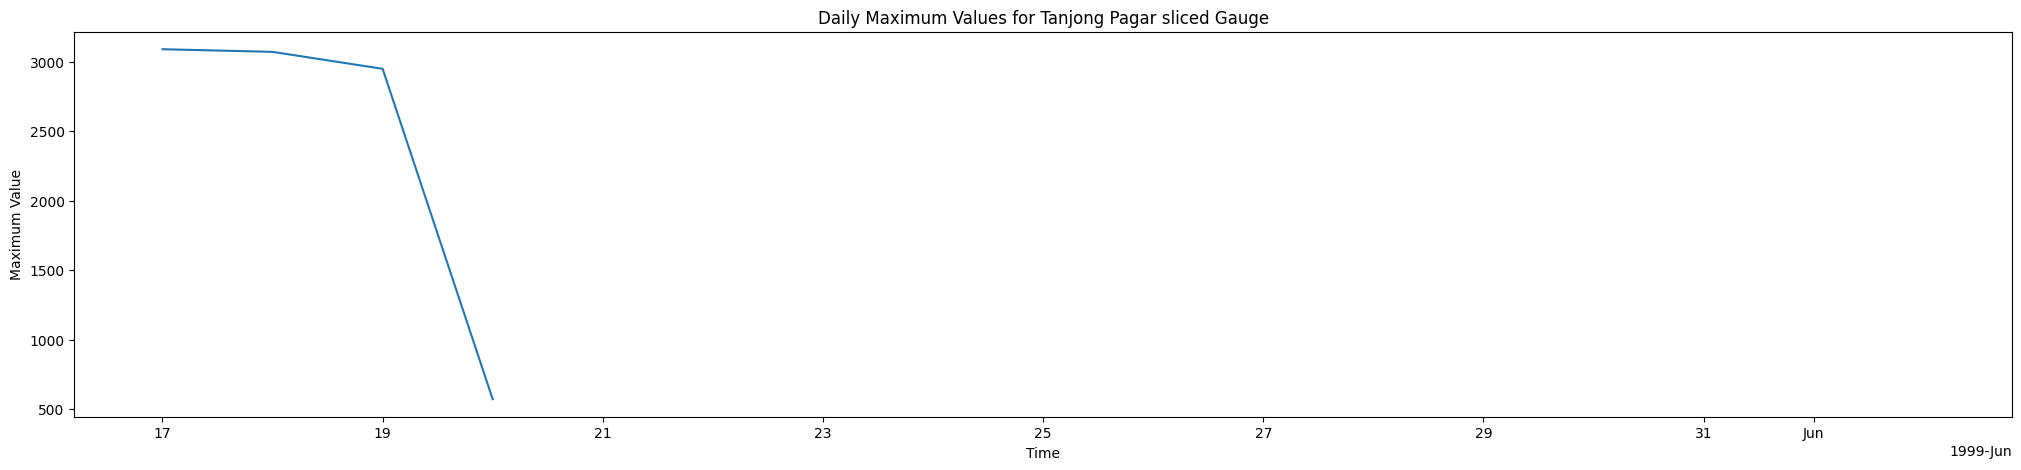

In [100]:
time_series_long_time(tp_resampled.sel(time=slice("1999-05-17T00:00:00.000000000", "1999-06-02T22:59:59.971200000")), "Tanjong Pagar sliced")

In [101]:
tp_hourly['sea_level']

<xarray.DataArray 'sea_level' (record_id: 1, time: 306808)> Size: 1MB
array([[2580., 2810., 2840., ..., 2120., 1850., 1620.]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2MB 1984-01-01 ... 2018-12-31T15:00:00
  * record_id  (record_id) int16 2B 6991
Attributes:
    long_name:  relative sea level
    units:      millimeters
    source:     in situ tide gauge water level observations
    platform:   station_name, station_country, station_country_code, uhslc_id...

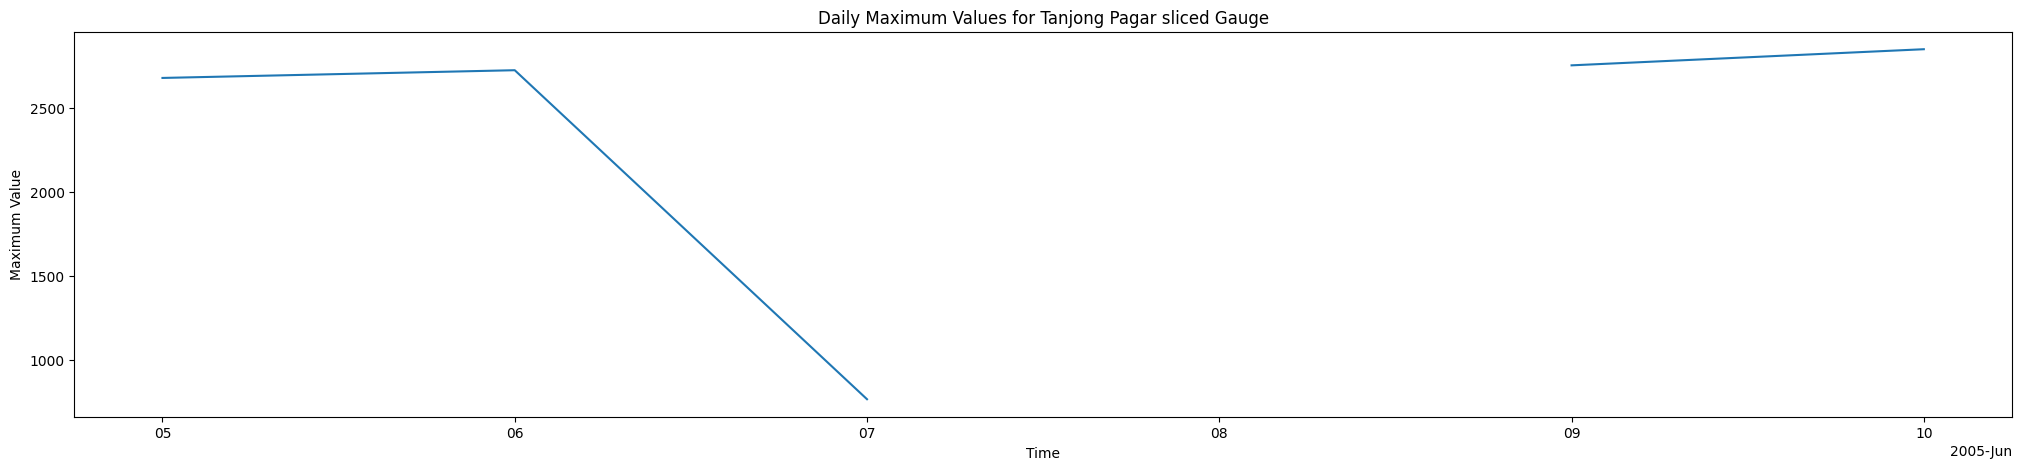

In [102]:
time_series_long_time(tp_resampled.sel(time=slice("2005-06-05T00:00:00.000000000", "2005-06-10T22:59:59.971200000")), "Tanjong Pagar sliced")

In [103]:
data = tp_hourly.sel(time=slice("2005-06-07T00:00:00.000000000", "2005-06-07T22:59:59.971200000"))["sea_level"]
(data.size-int(data.count()))/data.size*100

95.83333333333334

In [104]:
months={1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}

In [105]:
import pandas as pd
def testing_loop_idea(data, start, end):
    test_list=[]
    date_list=[]
    for year in range(start, end): 
        for i in range(1, 13):
            for j in range(1, months[i]+1):
                data_to_test = data.sel(time=slice(f"{year}-{i}-{j}T00:00:00.000000000", f"{year}-{i}-{j}T22:59:59.971200000"))
                nan_per=(data_to_test['sea_level'].size-int(data_to_test['sea_level'].count()))/data_to_test['sea_level'].size*100
                if nan_per<5:
                    print(f"nan_percent:{nan_per} and date:{year}-{i}-{j}")
                    test_list.append(data_to_test['sea_level'].max())
                    date_list.append(f"{year}-{i}-{j}")
    date_list = pd.to_datetime(date_list, format='%Y-%m-%d')
    return test_list, date_list

In [106]:
tp_resample_new, dates_tp=testing_loop_idea(tp_hourly, 1990, 2013)

nan_percent:0.0 and date:1990-1-1
nan_percent:0.0 and date:1990-1-2
nan_percent:0.0 and date:1990-1-3
nan_percent:0.0 and date:1990-1-4
nan_percent:0.0 and date:1990-1-5
nan_percent:0.0 and date:1990-1-6
nan_percent:0.0 and date:1990-1-7
nan_percent:0.0 and date:1990-1-8
nan_percent:0.0 and date:1990-1-9
nan_percent:0.0 and date:1990-1-10
nan_percent:0.0 and date:1990-1-11
nan_percent:0.0 and date:1990-1-12
nan_percent:0.0 and date:1990-1-13
nan_percent:0.0 and date:1990-1-14
nan_percent:0.0 and date:1990-1-15
nan_percent:0.0 and date:1990-1-16
nan_percent:0.0 and date:1990-1-17
nan_percent:0.0 and date:1990-1-18
nan_percent:0.0 and date:1990-1-19
nan_percent:0.0 and date:1990-1-20
nan_percent:0.0 and date:1990-1-21
nan_percent:0.0 and date:1990-1-22
nan_percent:0.0 and date:1990-1-23
nan_percent:0.0 and date:1990-1-24
nan_percent:0.0 and date:1990-1-25
nan_percent:0.0 and date:1990-1-26
nan_percent:0.0 and date:1990-1-27
nan_percent:0.0 and date:1990-1-28
nan_percent:0.0 and date:1990

7875


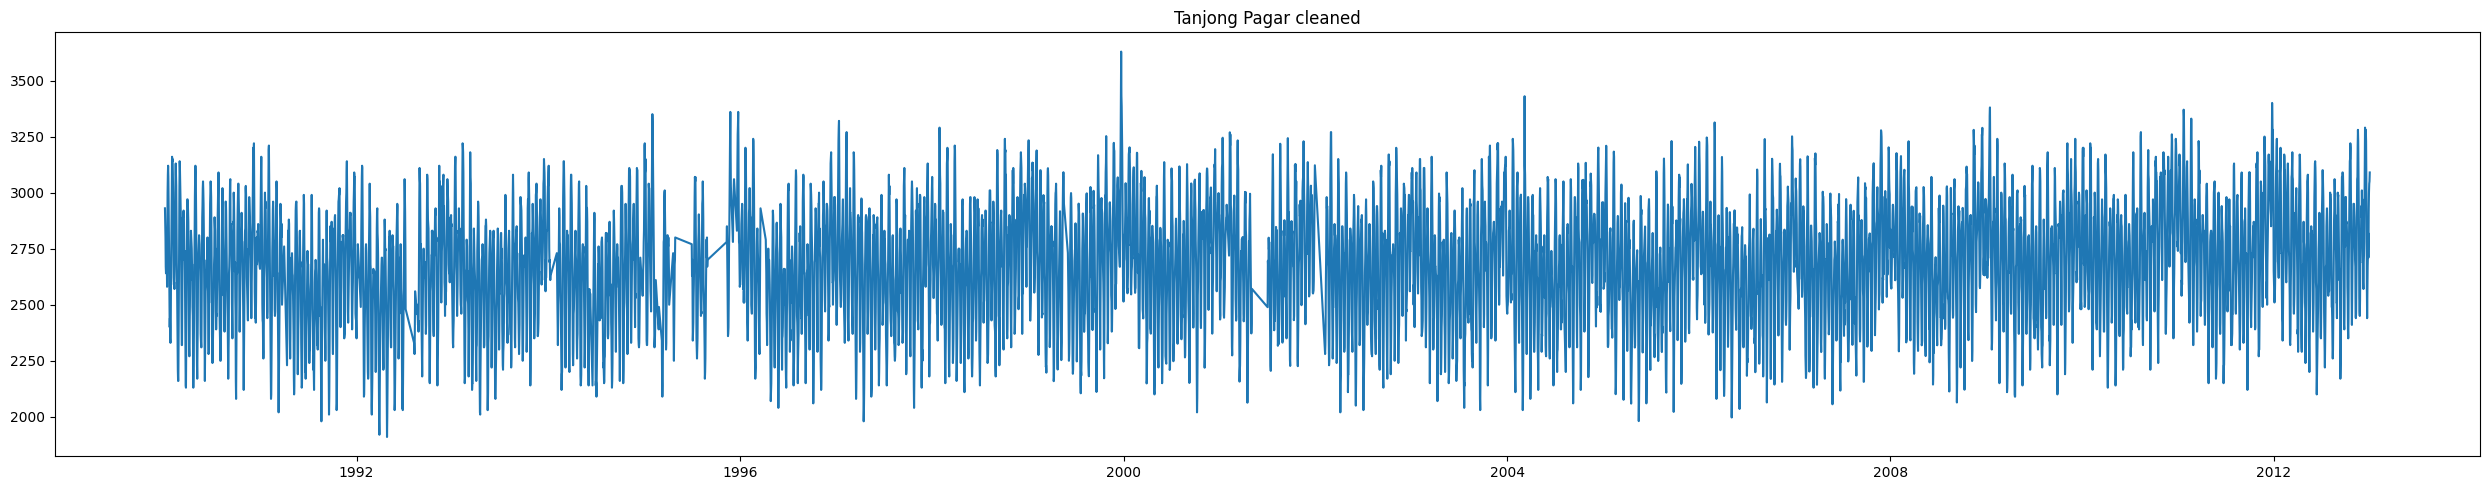

In [107]:
print(len(tp_resample_new))
plt.figure(figsize=(25, 5))
plt.plot(dates_tp, tp_resample_new)
plt.title("Tanjong Pagar cleaned")
plt.tight_layout()
plt.show()

In [108]:
sedili_resample_new, dates_sedili=testing_loop_idea(sedili_hourly, 1990, 2013)

nan_percent:0.0 and date:1990-1-1
nan_percent:0.0 and date:1990-1-2
nan_percent:0.0 and date:1990-1-3
nan_percent:0.0 and date:1990-1-4
nan_percent:0.0 and date:1990-1-5
nan_percent:0.0 and date:1990-1-6
nan_percent:0.0 and date:1990-1-7
nan_percent:0.0 and date:1990-1-8
nan_percent:0.0 and date:1990-1-9
nan_percent:0.0 and date:1990-1-10
nan_percent:0.0 and date:1990-1-11
nan_percent:0.0 and date:1990-1-12
nan_percent:0.0 and date:1990-1-13
nan_percent:0.0 and date:1990-1-14
nan_percent:0.0 and date:1990-1-15
nan_percent:0.0 and date:1990-1-16
nan_percent:0.0 and date:1990-1-17
nan_percent:0.0 and date:1990-1-18
nan_percent:0.0 and date:1990-1-19
nan_percent:0.0 and date:1990-1-20
nan_percent:0.0 and date:1990-1-21
nan_percent:0.0 and date:1990-1-22
nan_percent:0.0 and date:1990-1-23
nan_percent:0.0 and date:1990-1-24
nan_percent:0.0 and date:1990-1-25
nan_percent:0.0 and date:1990-1-26
nan_percent:0.0 and date:1990-1-27
nan_percent:0.0 and date:1990-1-28
nan_percent:0.0 and date:1990

8196


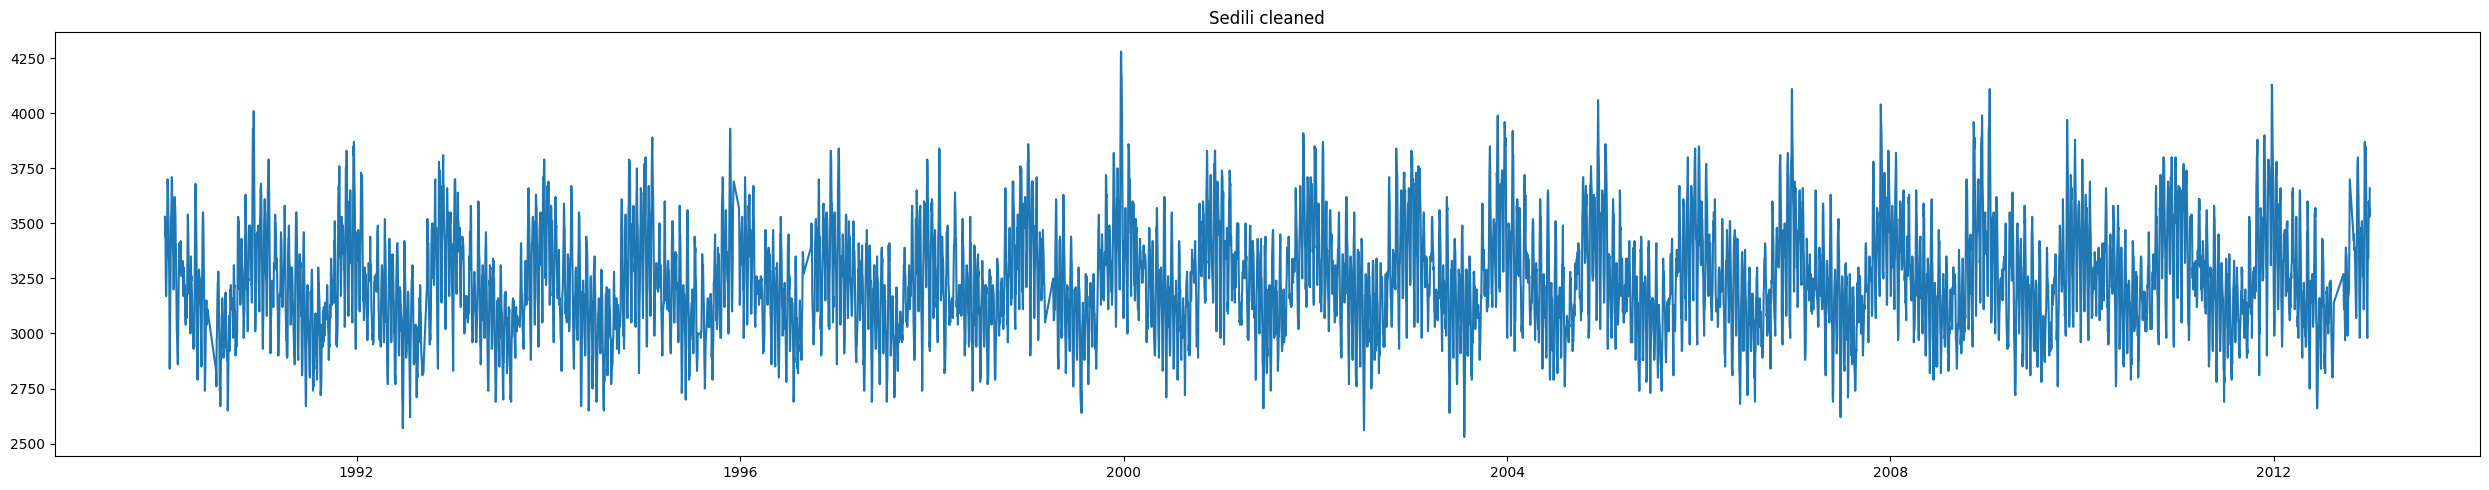

In [109]:
print(len(sedili_resample_new))
plt.figure(figsize=(25, 5))
plt.plot(dates_sedili, sedili_resample_new)
plt.title("Sedili cleaned")
plt.tight_layout()
plt.show()

nan_percent:0.0 and date:1990-1-1
nan_percent:0.0 and date:1990-1-2
nan_percent:0.0 and date:1990-1-3
nan_percent:0.0 and date:1990-1-4
nan_percent:0.0 and date:1990-1-5
nan_percent:0.0 and date:1990-1-6
nan_percent:0.0 and date:1990-1-7
nan_percent:0.0 and date:1990-1-8
nan_percent:0.0 and date:1990-1-9
nan_percent:0.0 and date:1990-1-10
nan_percent:0.0 and date:1990-1-11
nan_percent:0.0 and date:1990-1-12
nan_percent:0.0 and date:1990-1-13
nan_percent:0.0 and date:1990-1-14
nan_percent:0.0 and date:1990-1-15
nan_percent:0.0 and date:1990-1-16
nan_percent:0.0 and date:1990-1-17
nan_percent:0.0 and date:1990-1-18
nan_percent:0.0 and date:1990-1-19
nan_percent:0.0 and date:1990-1-20
nan_percent:0.0 and date:1990-1-21
nan_percent:0.0 and date:1990-1-22
nan_percent:0.0 and date:1990-1-23
nan_percent:0.0 and date:1990-1-24
nan_percent:0.0 and date:1990-1-25
nan_percent:0.0 and date:1990-1-26
nan_percent:0.0 and date:1990-1-27
nan_percent:0.0 and date:1990-1-28
nan_percent:0.0 and date:1990

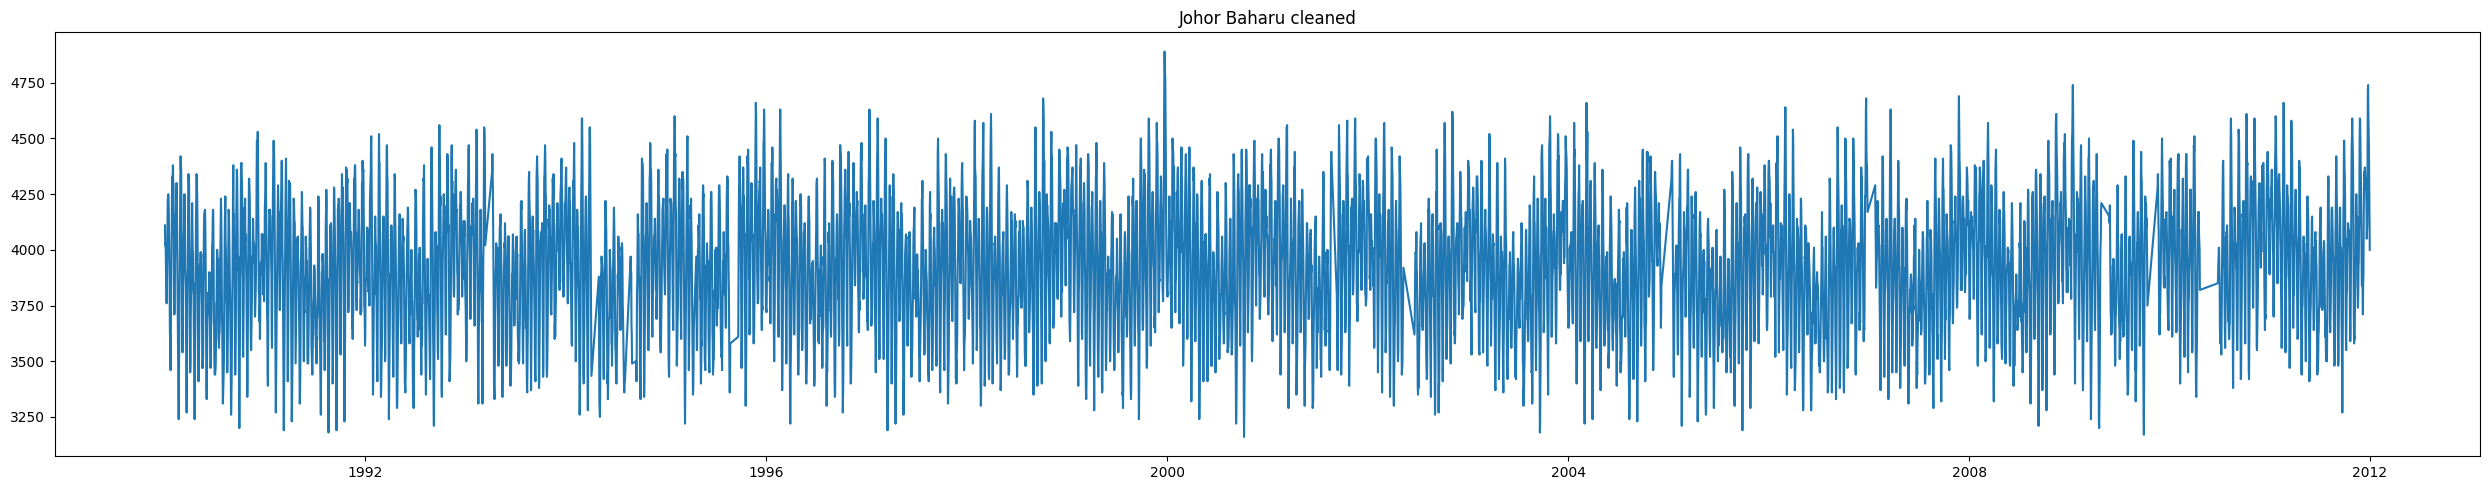

In [110]:
johor_resample_new, dates_jb=testing_loop_idea(jb_hourly, 1990, 2012)
print(len(johor_resample_new))
plt.figure(figsize=(25, 5))
plt.plot(dates_jb, johor_resample_new)
plt.title("Johor Baharu cleaned")
plt.tight_layout()
plt.show()

nan_percent:0.0 and date:1990-1-1
nan_percent:0.0 and date:1990-1-2
nan_percent:0.0 and date:1990-1-3
nan_percent:0.0 and date:1990-1-4
nan_percent:0.0 and date:1990-1-5
nan_percent:0.0 and date:1990-1-6
nan_percent:0.0 and date:1990-1-7
nan_percent:0.0 and date:1990-1-8
nan_percent:0.0 and date:1990-1-9
nan_percent:0.0 and date:1990-1-10
nan_percent:0.0 and date:1990-1-11
nan_percent:0.0 and date:1990-1-12
nan_percent:0.0 and date:1990-1-13
nan_percent:0.0 and date:1990-1-14
nan_percent:0.0 and date:1990-1-15
nan_percent:0.0 and date:1990-1-16
nan_percent:0.0 and date:1990-1-17
nan_percent:0.0 and date:1990-1-18
nan_percent:0.0 and date:1990-1-19
nan_percent:0.0 and date:1990-1-20
nan_percent:0.0 and date:1990-1-21
nan_percent:0.0 and date:1990-1-22
nan_percent:0.0 and date:1990-1-23
nan_percent:0.0 and date:1990-1-24
nan_percent:0.0 and date:1990-1-25
nan_percent:0.0 and date:1990-1-26
nan_percent:0.0 and date:1990-1-27
nan_percent:0.0 and date:1990-1-28
nan_percent:0.0 and date:1990

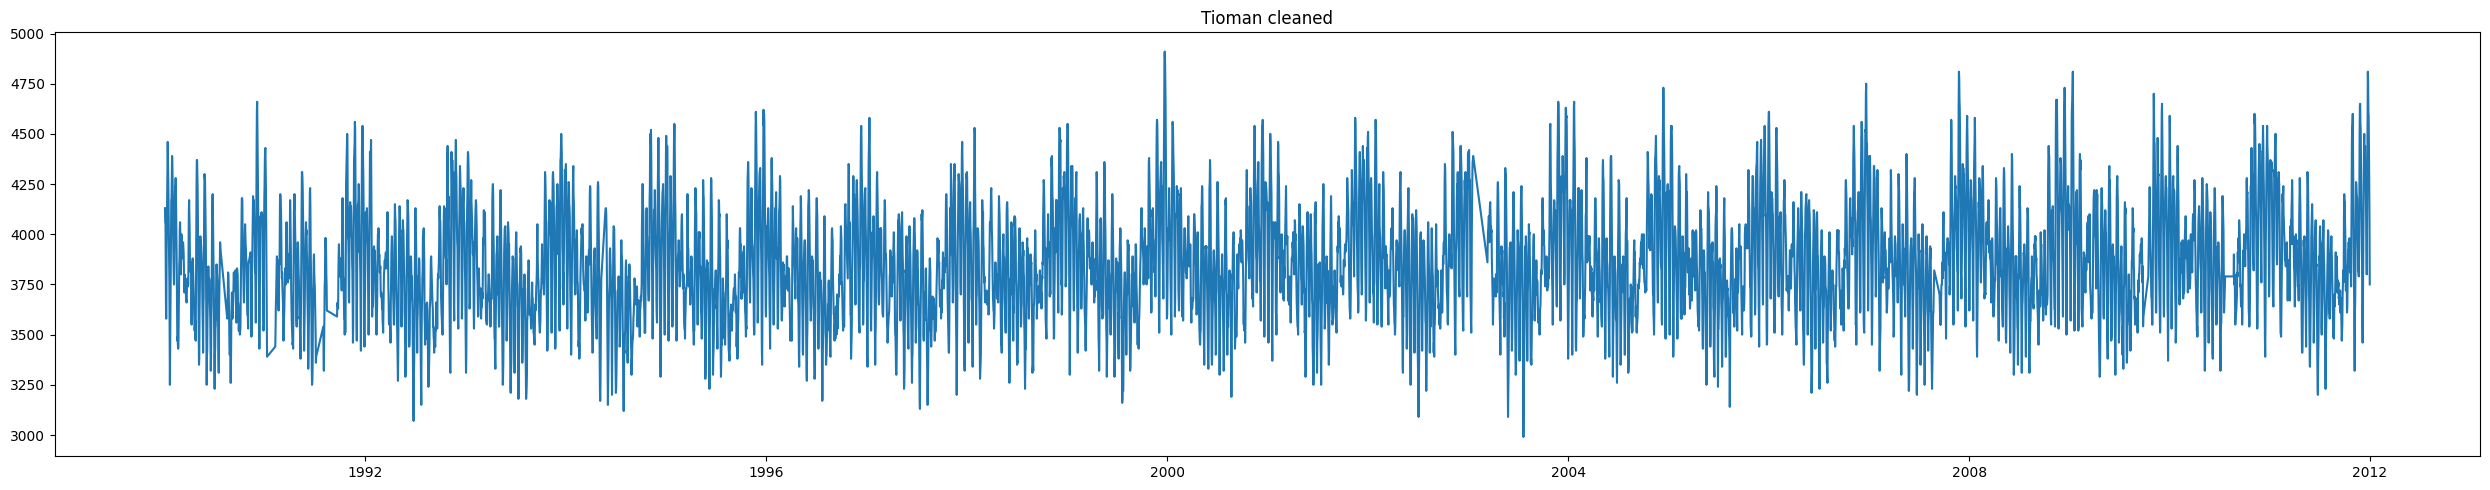

In [111]:
tioman_resample_new, dates_tioman=testing_loop_idea(tioman_hourly, 1990, 2012)
print(len(tioman_resample_new))
plt.figure(figsize=(25, 5))
plt.plot(dates_tioman, tioman_resample_new)
plt.title("Tioman cleaned")
plt.tight_layout()
plt.show()

nan_percent:0.0 and date:1990-1-1
nan_percent:0.0 and date:1990-1-2
nan_percent:0.0 and date:1990-1-3
nan_percent:0.0 and date:1990-1-4
nan_percent:0.0 and date:1990-1-5
nan_percent:0.0 and date:1990-1-6
nan_percent:0.0 and date:1990-1-7
nan_percent:0.0 and date:1990-1-8
nan_percent:0.0 and date:1990-1-9
nan_percent:0.0 and date:1990-1-10
nan_percent:0.0 and date:1990-1-11
nan_percent:0.0 and date:1990-1-12
nan_percent:0.0 and date:1990-1-13
nan_percent:0.0 and date:1990-1-14
nan_percent:0.0 and date:1990-1-15
nan_percent:0.0 and date:1990-1-16
nan_percent:0.0 and date:1990-1-17
nan_percent:0.0 and date:1990-1-18
nan_percent:0.0 and date:1990-1-19
nan_percent:0.0 and date:1990-1-20
nan_percent:0.0 and date:1990-1-21
nan_percent:0.0 and date:1990-1-22
nan_percent:0.0 and date:1990-1-23
nan_percent:0.0 and date:1990-1-24
nan_percent:0.0 and date:1990-1-25
nan_percent:0.0 and date:1990-1-26
nan_percent:0.0 and date:1990-1-27
nan_percent:0.0 and date:1990-1-28
nan_percent:0.0 and date:1990

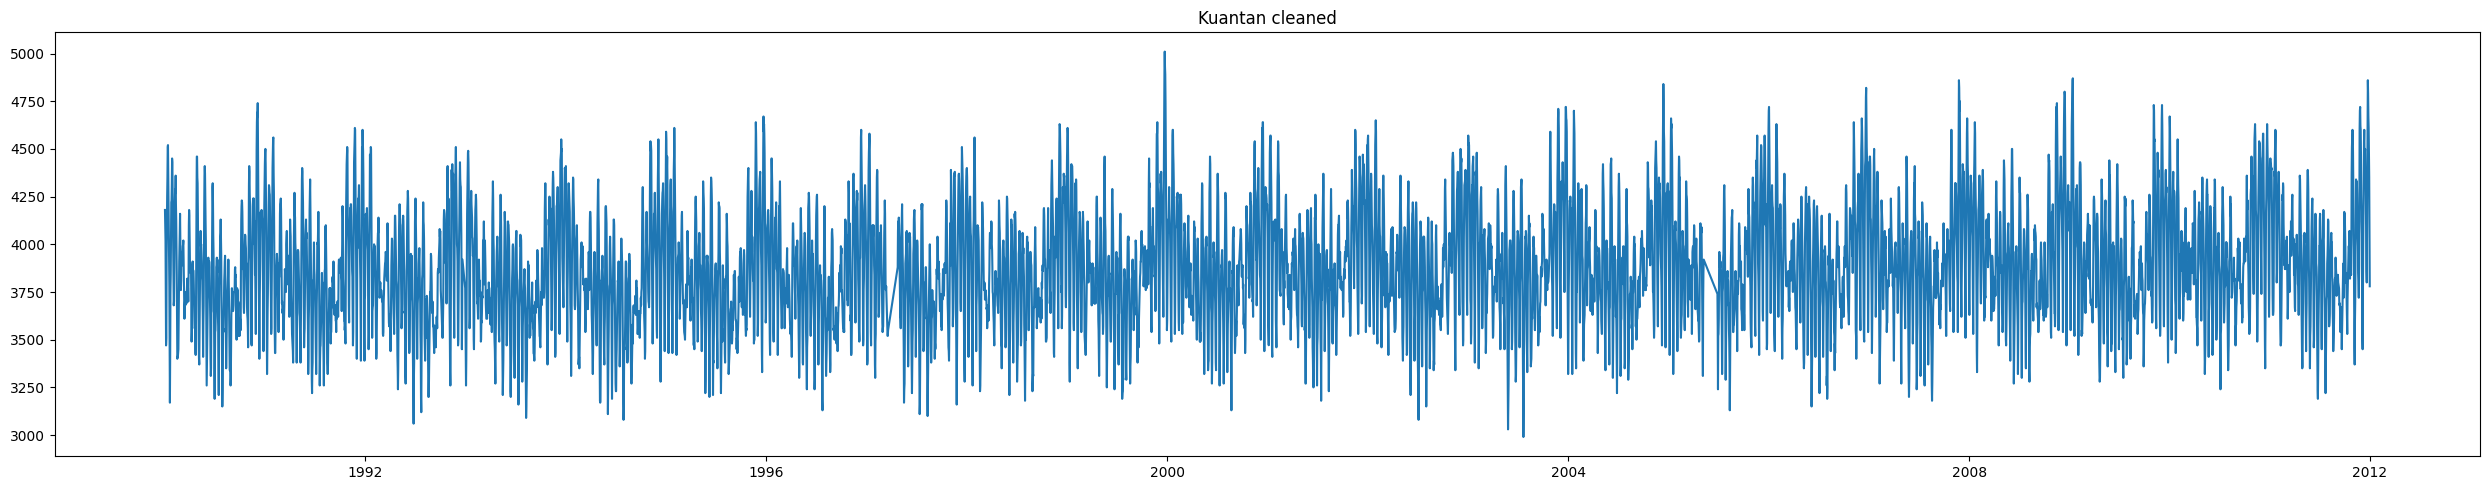

In [112]:
kuantan_resample_new, dates_kuantan=testing_loop_idea(kuantan_hourly, 1990, 2012)
print(len(kuantan_resample_new))
plt.figure(figsize=(25, 5))
plt.plot(dates_kuantan, kuantan_resample_new)
plt.title("Kuantan cleaned")
plt.tight_layout()
plt.show()

nan_percent:0.0 and date:1990-1-1
nan_percent:0.0 and date:1990-1-2
nan_percent:0.0 and date:1990-1-3
nan_percent:0.0 and date:1990-1-4
nan_percent:0.0 and date:1990-1-5
nan_percent:0.0 and date:1990-1-6
nan_percent:0.0 and date:1990-1-7
nan_percent:0.0 and date:1990-1-8
nan_percent:0.0 and date:1990-1-9
nan_percent:0.0 and date:1990-1-10
nan_percent:0.0 and date:1990-1-11
nan_percent:0.0 and date:1990-1-12
nan_percent:0.0 and date:1990-1-13
nan_percent:0.0 and date:1990-1-14
nan_percent:0.0 and date:1990-1-15
nan_percent:0.0 and date:1990-1-16
nan_percent:0.0 and date:1990-1-17
nan_percent:0.0 and date:1990-1-18
nan_percent:0.0 and date:1990-1-19
nan_percent:0.0 and date:1990-1-20
nan_percent:0.0 and date:1990-1-21
nan_percent:0.0 and date:1990-1-22
nan_percent:0.0 and date:1990-1-23
nan_percent:0.0 and date:1990-1-24
nan_percent:0.0 and date:1990-1-25
nan_percent:0.0 and date:1990-1-26
nan_percent:0.0 and date:1990-1-27
nan_percent:0.0 and date:1990-1-28
nan_percent:0.0 and date:1990

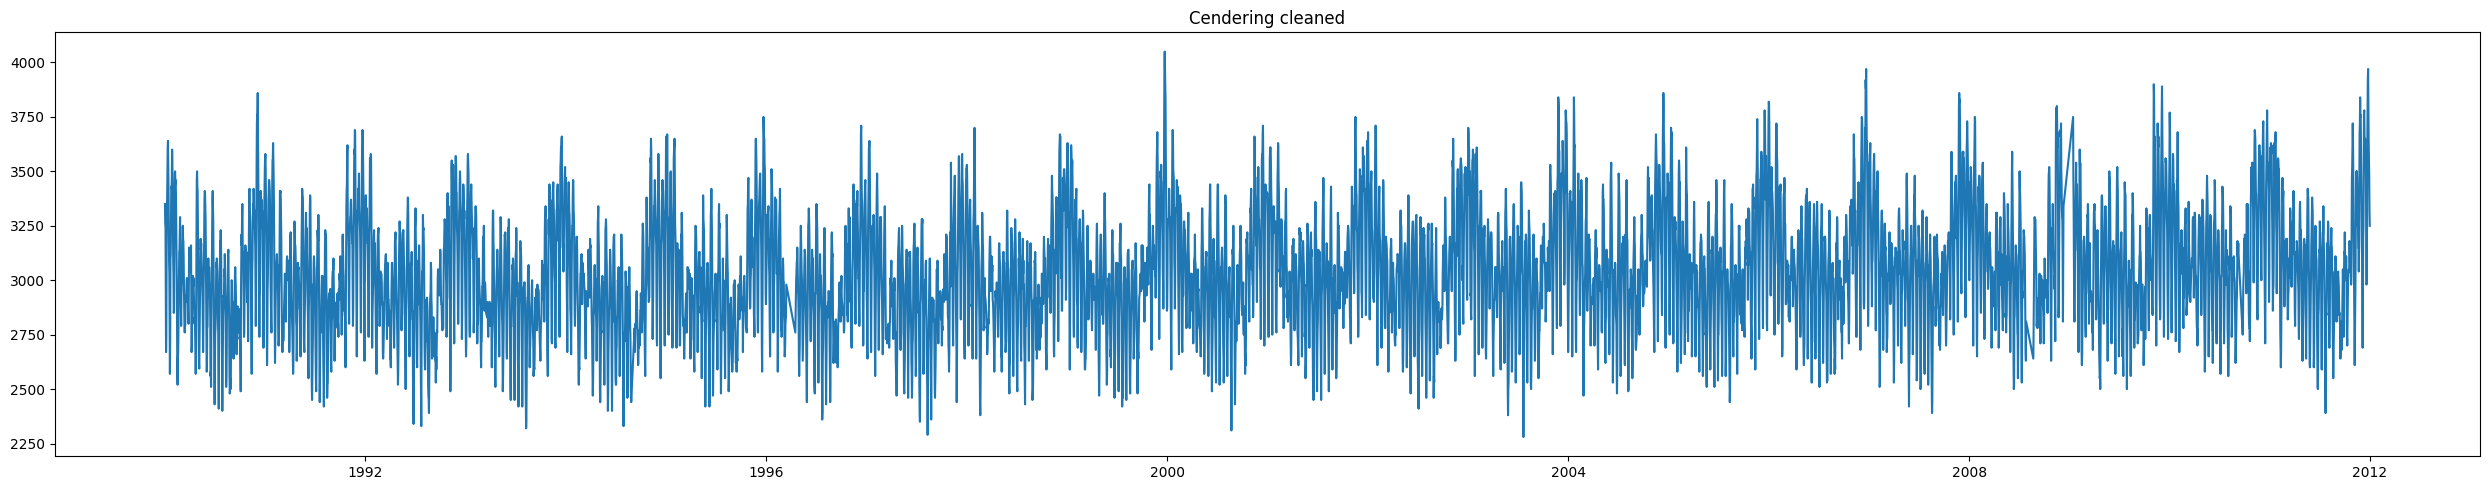

In [113]:
cendering_resample_new, dates_cendering=testing_loop_idea(cendering_hourly, 1990, 2012)
print(len(cendering_resample_new))
plt.figure(figsize=(25, 5))
plt.plot(dates_cendering, cendering_resample_new)
plt.title("Cendering cleaned")
plt.tight_layout()
plt.show()

nan_percent:0.0 and date:1990-1-1
nan_percent:0.0 and date:1990-1-2
nan_percent:0.0 and date:1990-1-3
nan_percent:0.0 and date:1990-1-4
nan_percent:0.0 and date:1990-1-5
nan_percent:0.0 and date:1990-1-6
nan_percent:0.0 and date:1990-1-7
nan_percent:0.0 and date:1990-1-8
nan_percent:0.0 and date:1990-1-9
nan_percent:0.0 and date:1990-1-10
nan_percent:0.0 and date:1990-1-11
nan_percent:0.0 and date:1990-1-12
nan_percent:0.0 and date:1990-1-13
nan_percent:0.0 and date:1990-1-14
nan_percent:0.0 and date:1990-1-15
nan_percent:0.0 and date:1990-1-16
nan_percent:0.0 and date:1990-1-17
nan_percent:0.0 and date:1990-1-18
nan_percent:0.0 and date:1990-1-19
nan_percent:0.0 and date:1990-1-20
nan_percent:0.0 and date:1990-1-21
nan_percent:0.0 and date:1990-1-22
nan_percent:0.0 and date:1990-1-23
nan_percent:0.0 and date:1990-1-24
nan_percent:0.0 and date:1990-1-25
nan_percent:0.0 and date:1990-1-26
nan_percent:0.0 and date:1990-1-27
nan_percent:0.0 and date:1990-1-28
nan_percent:0.0 and date:1990

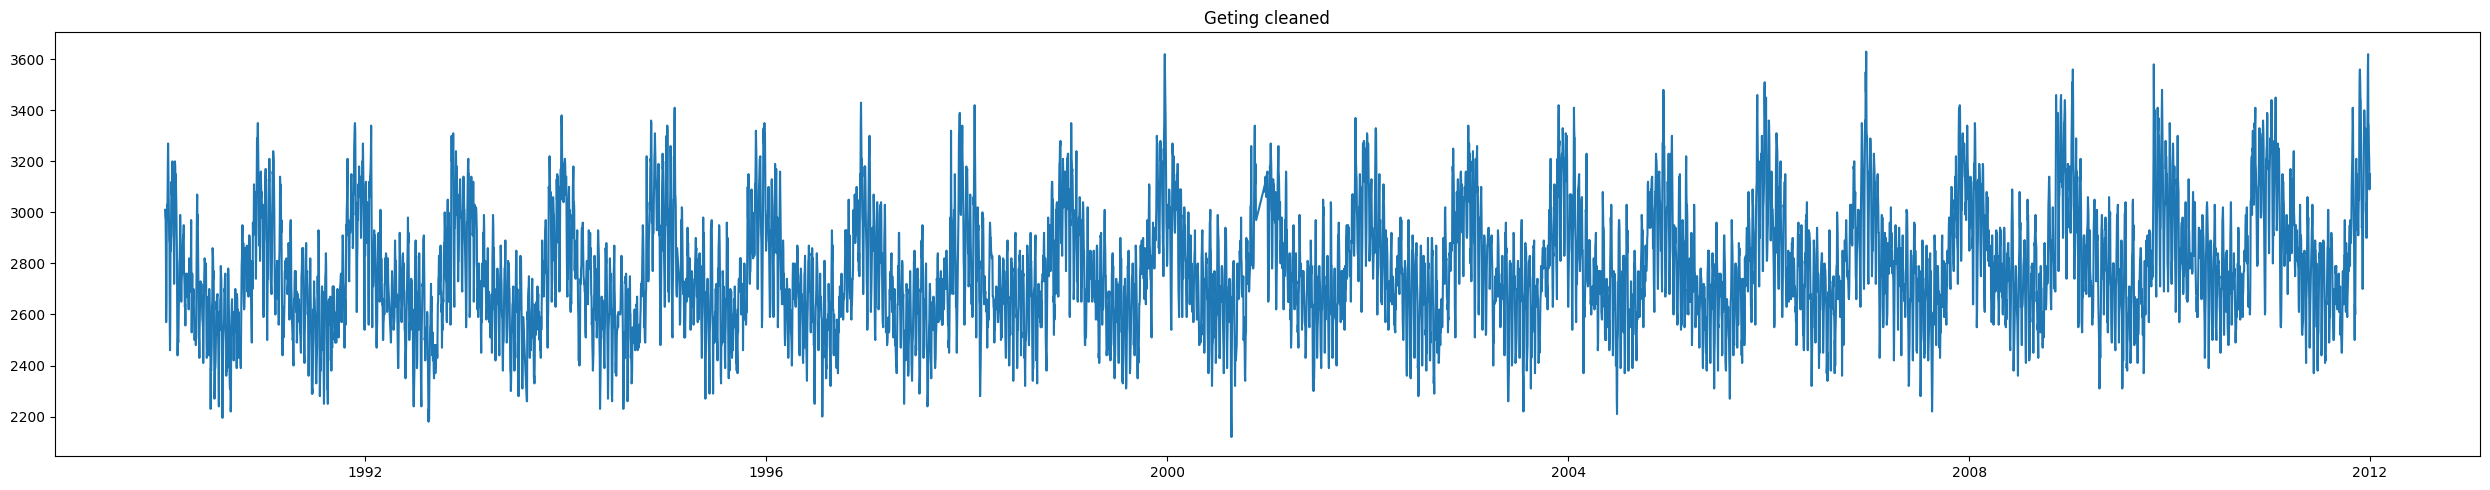

In [114]:
geting_resample_new, dates_geting=testing_loop_idea(geting_hourly, 1990, 2012)
print(len(geting_resample_new))
plt.figure(figsize=(25, 5))
plt.plot(dates_geting, geting_resample_new)
plt.title("Geting cleaned")
plt.tight_layout()
plt.show()

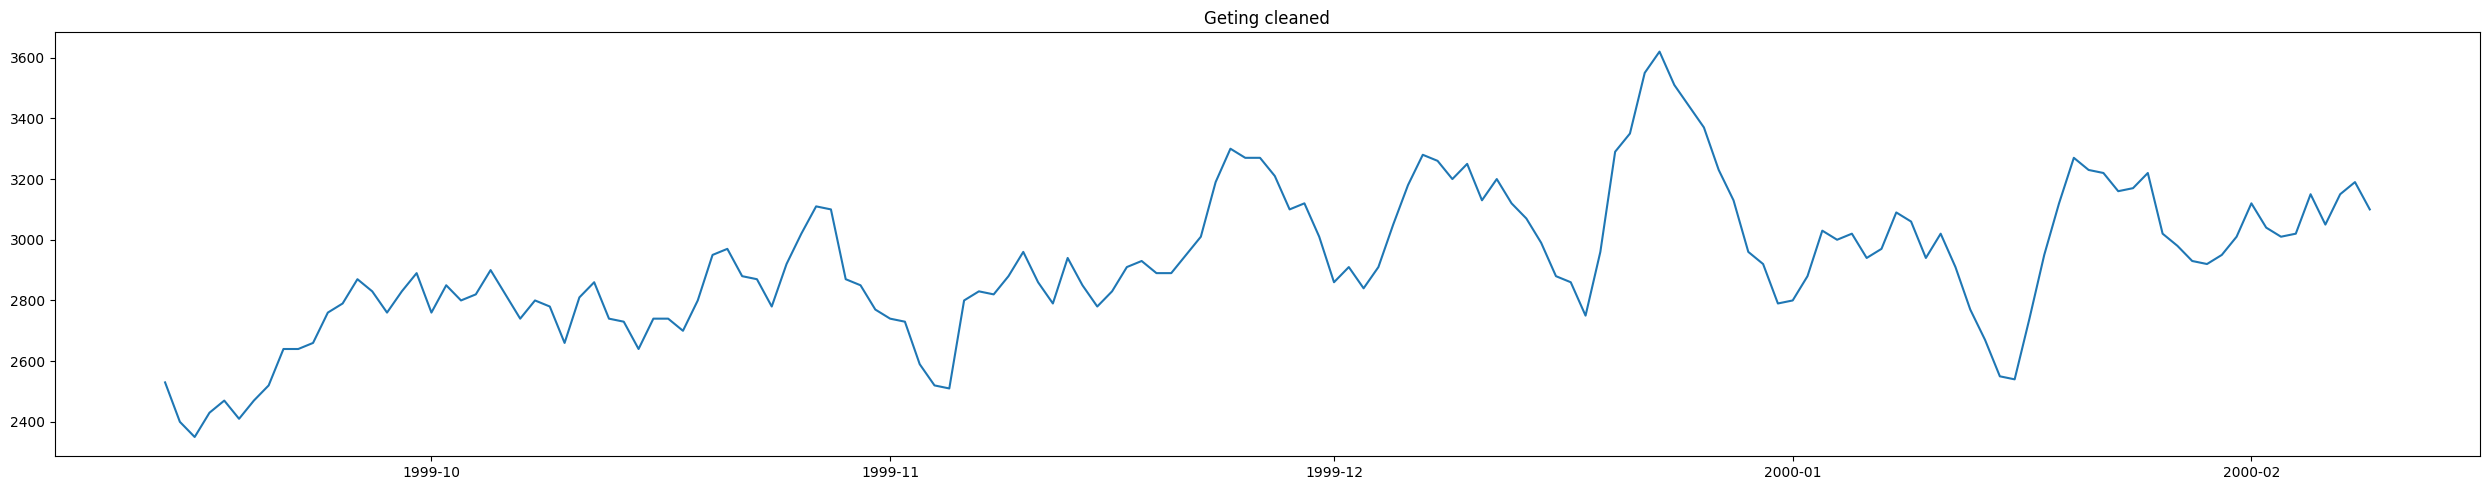

In [115]:
plt.figure(figsize=(25, 5))
plt.plot(dates_geting[3500:3650:1], geting_resample_new[3500:3650:1])
plt.title("Geting cleaned")
plt.tight_layout()
plt.show()

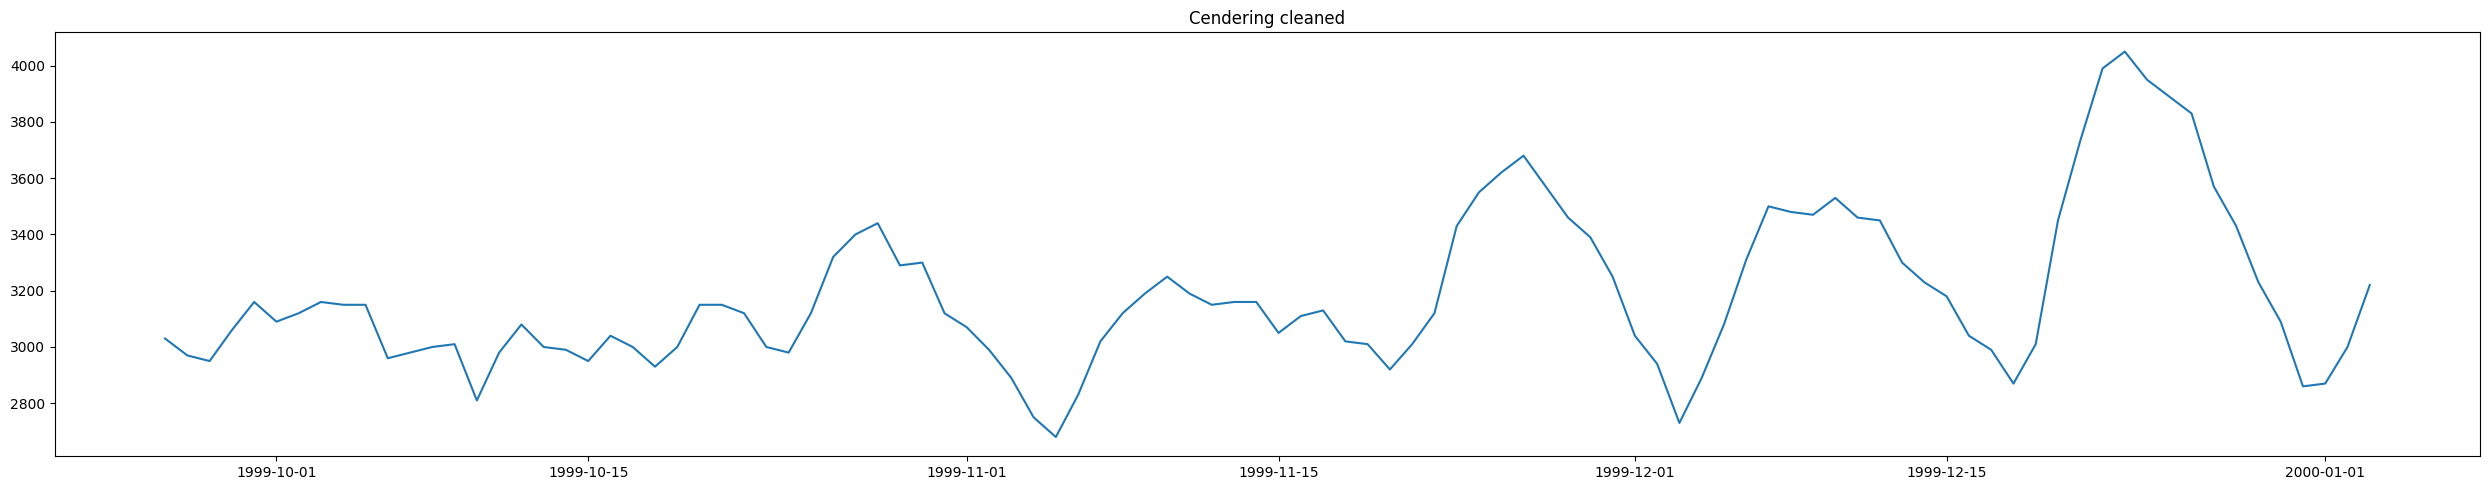

In [116]:
plt.figure(figsize=(25, 5))
plt.plot(dates_cendering[3500:3600:1], cendering_resample_new[3500:3600:1])
plt.title("Cendering cleaned")
plt.tight_layout()
plt.show()

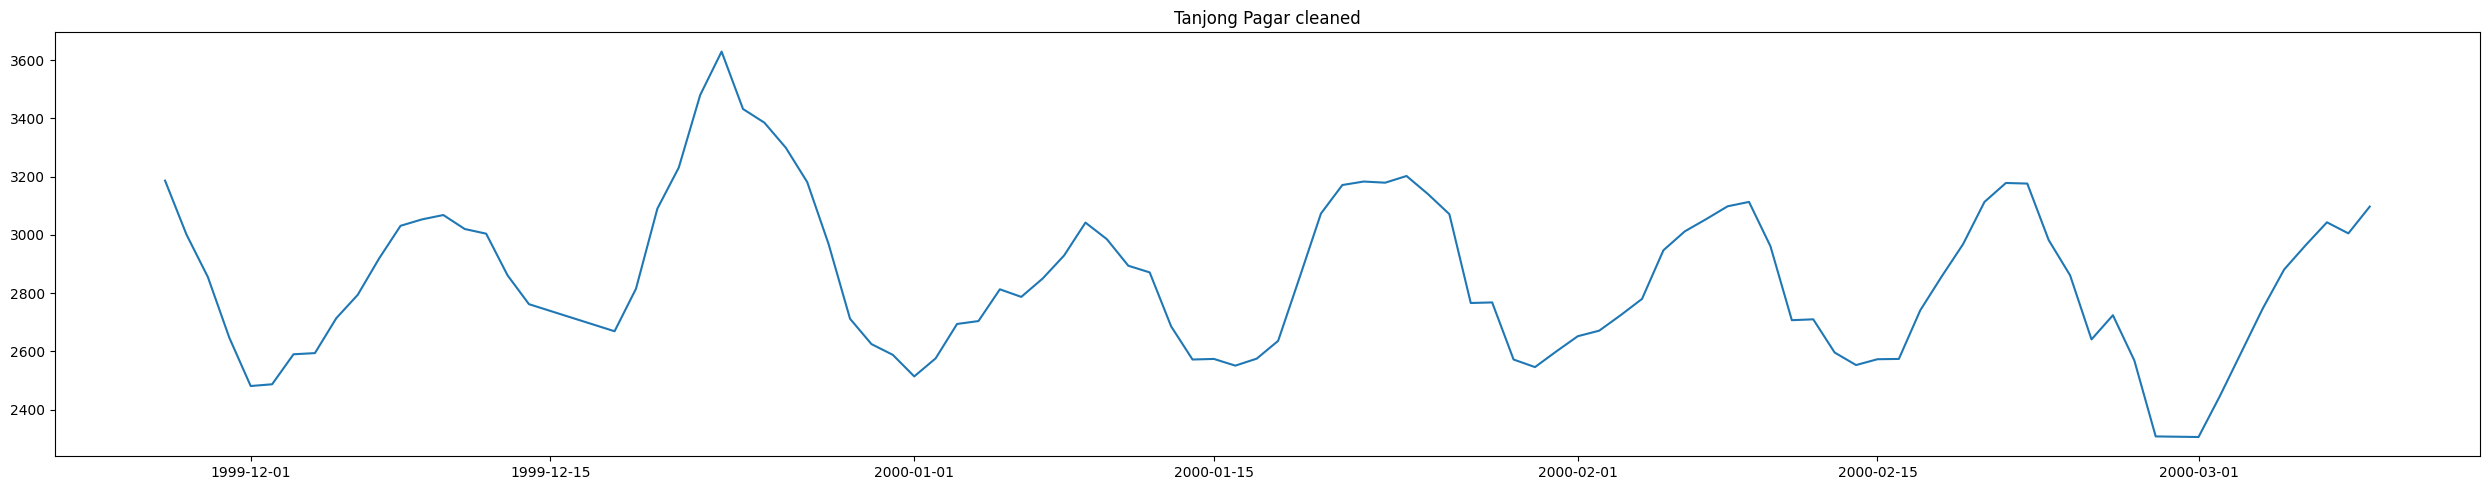

In [117]:
plt.figure(figsize=(25, 5))
plt.plot(dates_tp[3250:3350:1], tp_resample_new[3250:3350:1])
plt.title("Tanjong Pagar cleaned")
plt.tight_layout()
plt.show()

In [118]:
subset = sd.sel(time=slice("1999-11-01", "1999-12-31"))
time_coords = subset['time'].values
values = subset['surge-day'].values
for time, value in zip(time_coords, values):
    if value==1.0:
        print(f"Time: {time}, Value: {value}")

Time: 1999-12-07T00:00:00.000000000, Value: 1.0
Time: 1999-12-08T00:00:00.000000000, Value: 1.0
Time: 1999-12-09T00:00:00.000000000, Value: 1.0
Time: 1999-12-10T00:00:00.000000000, Value: 1.0
Time: 1999-12-20T00:00:00.000000000, Value: 1.0
Time: 1999-12-21T00:00:00.000000000, Value: 1.0
Time: 1999-12-22T00:00:00.000000000, Value: 1.0
Time: 1999-12-23T00:00:00.000000000, Value: 1.0
Time: 1999-12-24T00:00:00.000000000, Value: 1.0
Time: 1999-12-25T00:00:00.000000000, Value: 1.0
Time: 1999-12-27T00:00:00.000000000, Value: 1.0


In [119]:
subset = sd.sel(time=slice("2000-11-01", "2001-12-31"))
time_coords = subset['time'].values
values = subset['surge-day'].values
for time, value in zip(time_coords, values):
    if value==1.0:
        print(f"Time: {time}, Value: {value}")

Time: 2000-11-21T00:00:00.000000000, Value: 1.0
Time: 2000-12-21T00:00:00.000000000, Value: 1.0
Time: 2001-01-15T00:00:00.000000000, Value: 1.0
Time: 2001-01-16T00:00:00.000000000, Value: 1.0
Time: 2001-01-28T00:00:00.000000000, Value: 1.0
Time: 2001-01-29T00:00:00.000000000, Value: 1.0
Time: 2001-02-08T00:00:00.000000000, Value: 1.0
Time: 2001-02-09T00:00:00.000000000, Value: 1.0
Time: 2001-02-10T00:00:00.000000000, Value: 1.0
Time: 2001-02-13T00:00:00.000000000, Value: 1.0
Time: 2001-02-14T00:00:00.000000000, Value: 1.0
Time: 2001-02-15T00:00:00.000000000, Value: 1.0
Time: 2001-02-16T00:00:00.000000000, Value: 1.0
Time: 2001-11-20T00:00:00.000000000, Value: 1.0
Time: 2001-12-06T00:00:00.000000000, Value: 1.0
Time: 2001-12-18T00:00:00.000000000, Value: 1.0
Time: 2001-12-19T00:00:00.000000000, Value: 1.0
Time: 2001-12-20T00:00:00.000000000, Value: 1.0
Time: 2001-12-21T00:00:00.000000000, Value: 1.0
Time: 2001-12-22T00:00:00.000000000, Value: 1.0
Time: 2001-12-23T00:00:00.000000000, Val

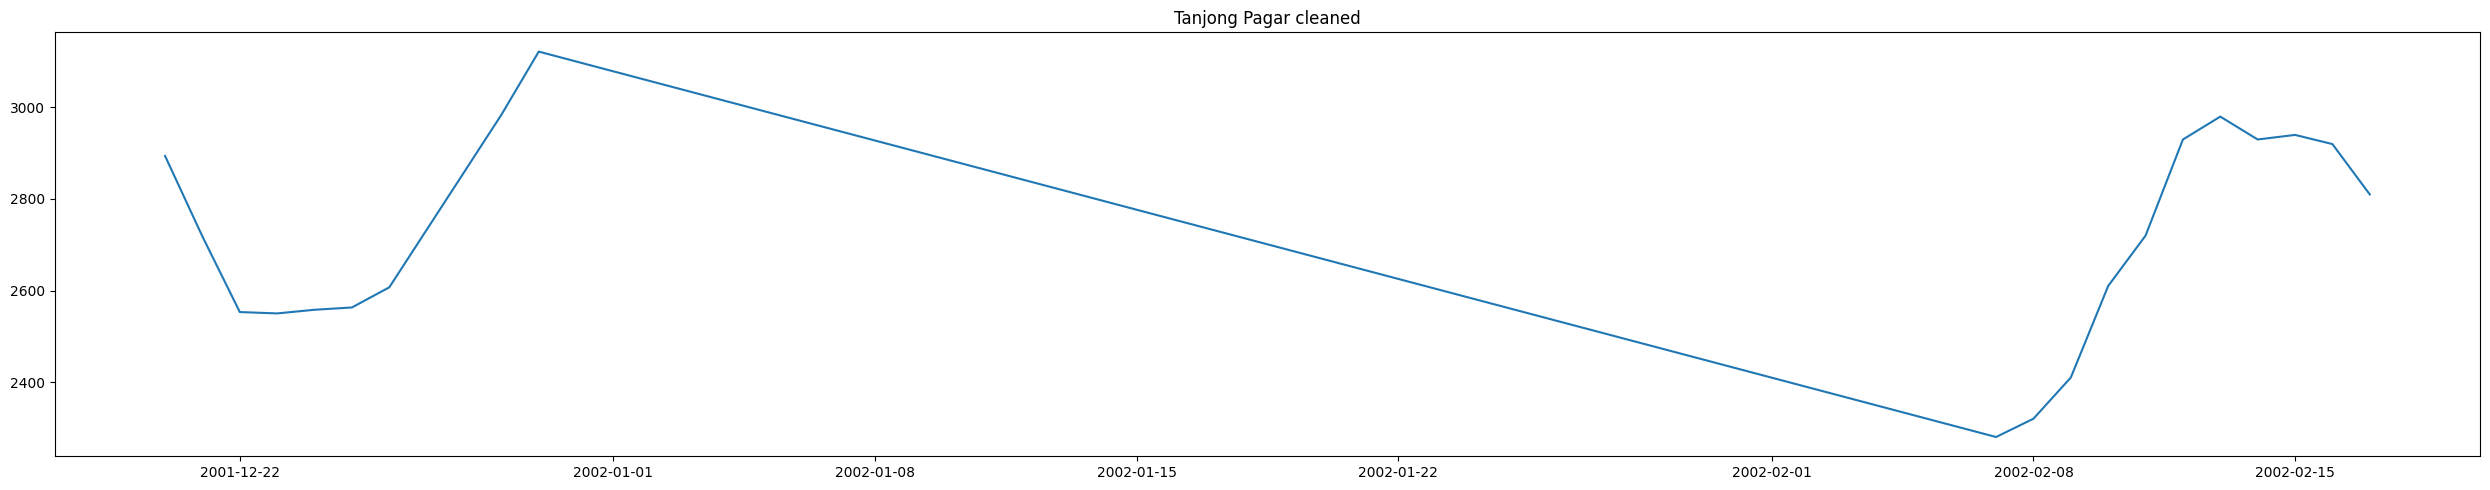

In [120]:
plt.figure(figsize=(25, 5))
plt.plot(dates_tp[3930:3950:1], tp_resample_new[3930:3950:1])
plt.title("Tanjong Pagar cleaned")
plt.tight_layout()
plt.show()

In [121]:
dates_tp[3930:3950:1]

DatetimeIndex(['2001-12-20', '2001-12-21', '2001-12-22', '2001-12-23',
               '2001-12-24', '2001-12-25', '2001-12-26', '2001-12-29',
               '2001-12-30', '2002-02-07', '2002-02-08', '2002-02-09',
               '2002-02-10', '2002-02-11', '2002-02-12', '2002-02-13',
               '2002-02-14', '2002-02-15', '2002-02-16', '2002-02-17'],
              dtype='datetime64[ns]', freq=None)

In [122]:
tp_hourly.sel(time=slice("2002-01-01T00:00:00.000000000", "2002-01-30T22:59:59.971200000"))['sea_level'].values

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan

In [123]:
cendering_hourly.sel(time=slice("2001-12-21T00:00:00.000000000", "2001-12-21T22:59:59.971200000"))['sea_level'].values

array([[2470., 2400., 2280., 2230., 2250., 2080., 1950., 1950., 1950.,
        1910., 1980., 2140., 2370., 2640., 2950., 3250., 3320., 3420.,
        3410., 3360., 3140., 3010., 2950., 2810.]], dtype=float32)

In [124]:
kuantan_hourly.sel(time=slice("2001-12-21T00:00:00.000000000", "2001-12-21T22:59:59.971200000"))['sea_level'].values

array([[2980., 2930., 2950., 2920., 2900., 2880., 2750., 2550., 2460.,
        2410., 2410., 2440., 2620., 2900., 3220., 3600., 3880., 4130.,
        4210., 4230., 4060., 3850., 3590., 3290.]], dtype=float32)

In [125]:
from scipy import stats as sts

In [126]:
def stats_stuff(data, name): 
    print(f"Descriptive stats:{sts.describe(data)}\nShapiro-Wilk Normality test:{sts.shapiro(data)}\n90th percentile:{sts.scoreatpercentile(data, per=90)}")
    q25, q75 = sts.scoreatpercentile(data, 25), sts.scoreatpercentile(data, 75)
    bin_width = 2 * (q75 - q25) * len(data) ** (-1/3)
    bins = int((max(data) - min(data)) / bin_width)
    print("Freedman–Diaconis number of bins:", bins)
    plt.figure(figsize=(12,4))
    plt.hist(data, density=False, bins=bins)
    plt.title(f"Histogram for {name} cleaned data")
    plt.show()

C:\Users\SHRINJANA\AppData\Local\Temp\ipykernel_20872\3908181631.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7959.
  print(f"Descriptive stats:{sts.describe(data)}\nShapiro-Wilk Normality test:{sts.shapiro(data)}\n90th percentile:{sts.scoreatpercentile(data, per=90)}")


Descriptive stats:DescribeResult(nobs=7959, minmax=(2120.0, 3630.0), mean=2777.834, variance=52580.97757415886, skewness=0.42462594150698285, kurtosis=0.001631840464170864)
Shapiro-Wilk Normality test:ShapiroResult(statistic=0.987375410791086, pvalue=4.8772813011635474e-26)
90th percentile:3100.0
Freedman–Diaconis number of bins: 50


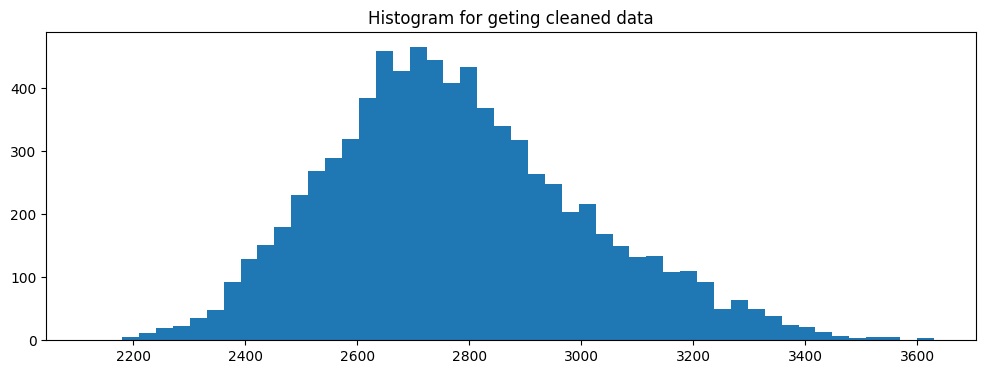

In [127]:
stats_stuff(geting_resample_new, "geting")

C:\Users\SHRINJANA\AppData\Local\Temp\ipykernel_20872\3908181631.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7904.
  print(f"Descriptive stats:{sts.describe(data)}\nShapiro-Wilk Normality test:{sts.shapiro(data)}\n90th percentile:{sts.scoreatpercentile(data, per=90)}")


Descriptive stats:DescribeResult(nobs=7904, minmax=(2280.0, 4050.0), mean=3039.1472, variance=74209.88890294825, skewness=0.2565300099584034, kurtosis=-0.15844666559524434)
Shapiro-Wilk Normality test:ShapiroResult(statistic=0.9948001548029592, pvalue=2.508255503392254e-16)
90th percentile:3410.0
Freedman–Diaconis number of bins: 46


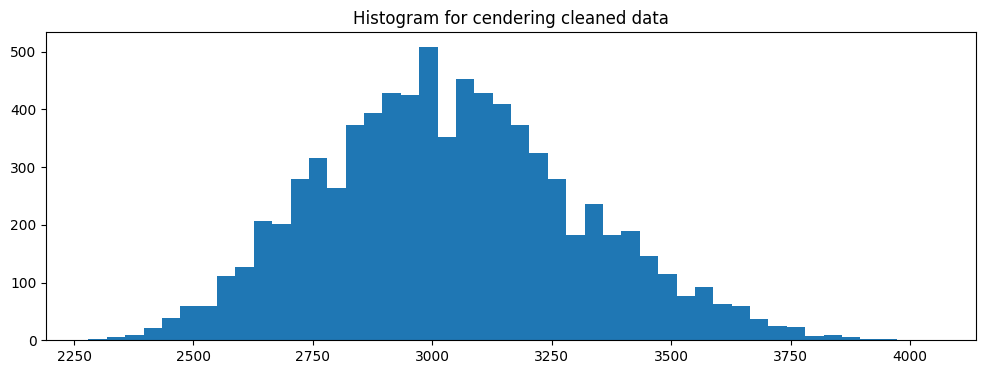

In [128]:
stats_stuff(cendering_resample_new, "cendering")

C:\Users\SHRINJANA\AppData\Local\Temp\ipykernel_20872\3908181631.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7936.
  print(f"Descriptive stats:{sts.describe(data)}\nShapiro-Wilk Normality test:{sts.shapiro(data)}\n90th percentile:{sts.scoreatpercentile(data, per=90)}")


Descriptive stats:DescribeResult(nobs=7936, minmax=(2990.0, 5010.0), mean=3879.845, variance=91294.50384373032, skewness=0.25449066334077736, kurtosis=-0.16345676845727697)
Shapiro-Wilk Normality test:ShapiroResult(statistic=0.9949782113049368, pvalue=4.924380711915204e-16)
90th percentile:4290.0
Freedman–Diaconis number of bins: 49


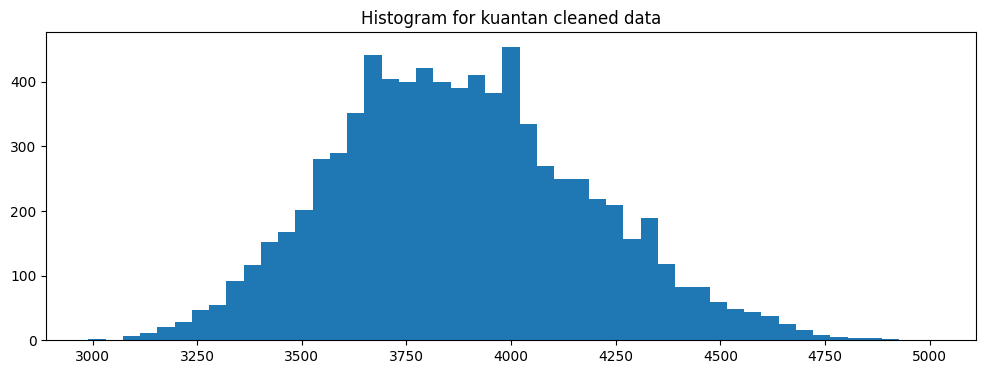

In [129]:
stats_stuff(kuantan_resample_new, "kuantan")

C:\Users\SHRINJANA\AppData\Local\Temp\ipykernel_20872\3908181631.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7763.
  print(f"Descriptive stats:{sts.describe(data)}\nShapiro-Wilk Normality test:{sts.shapiro(data)}\n90th percentile:{sts.scoreatpercentile(data, per=90)}")


Descriptive stats:DescribeResult(nobs=7763, minmax=(2990.0, 4910.0), mean=3854.321, variance=78725.00042877157, skewness=0.3119489426461765, kurtosis=-0.06486949458623625)
Shapiro-Wilk Normality test:ShapiroResult(statistic=0.9932492351740464, pvalue=9.845450478331054e-19)
90th percentile:4230.0
Freedman–Diaconis number of bins: 51


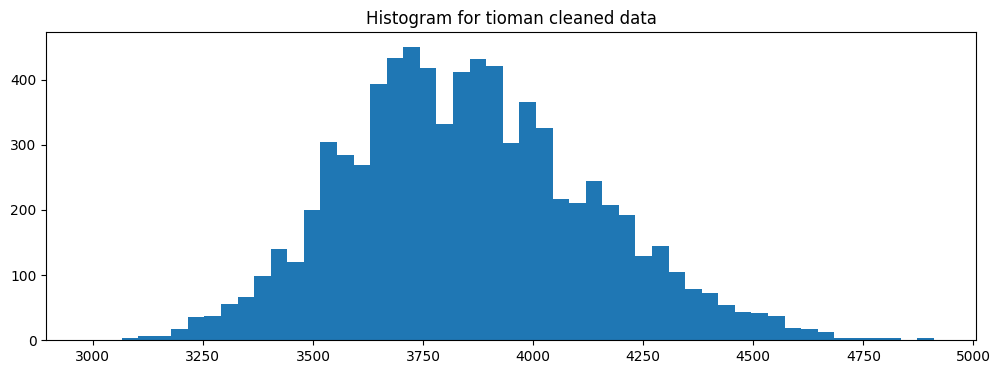

In [130]:
stats_stuff(tioman_resample_new, "tioman")

C:\Users\SHRINJANA\AppData\Local\Temp\ipykernel_20872\3908181631.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7875.
  print(f"Descriptive stats:{sts.describe(data)}\nShapiro-Wilk Normality test:{sts.shapiro(data)}\n90th percentile:{sts.scoreatpercentile(data, per=90)}")


Descriptive stats:DescribeResult(nobs=7875, minmax=(1910.0, 3629.0), mean=2682.86, variance=72689.38664830456, skewness=-0.11883769941649797, kurtosis=-0.6212454947449046)
Shapiro-Wilk Normality test:ShapiroResult(statistic=0.9913680069142959, pvalue=1.6996539352035575e-21)
90th percentile:3030.0
Freedman–Diaconis number of bins: 42


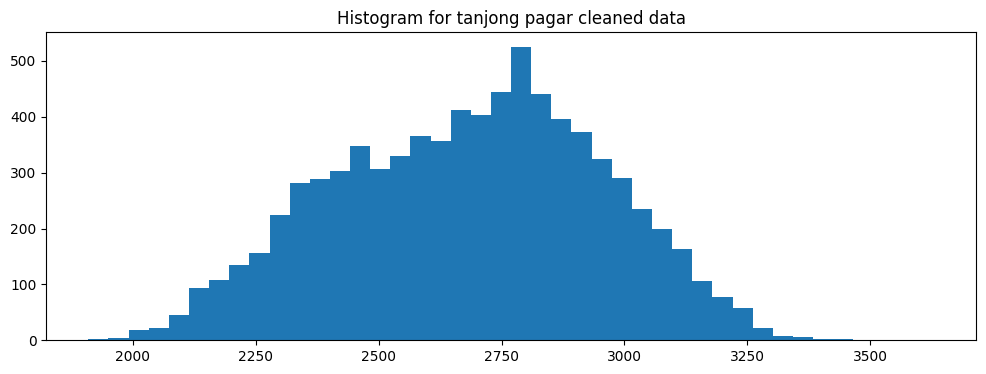

In [131]:
stats_stuff(tp_resample_new, "tanjong pagar")

C:\Users\SHRINJANA\AppData\Local\Temp\ipykernel_20872\3908181631.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8196.
  print(f"Descriptive stats:{sts.describe(data)}\nShapiro-Wilk Normality test:{sts.shapiro(data)}\n90th percentile:{sts.scoreatpercentile(data, per=90)}")


Descriptive stats:DescribeResult(nobs=8196, minmax=(2530.0, 4280.0), mean=3239.559, variance=58404.500976205, skewness=0.347949471079615, kurtosis=0.00897396400698236)
Shapiro-Wilk Normality test:ShapiroResult(statistic=0.9920746543027034, pvalue=5.508605804388401e-21)
90th percentile:3570.0
Freedman–Diaconis number of bins: 55


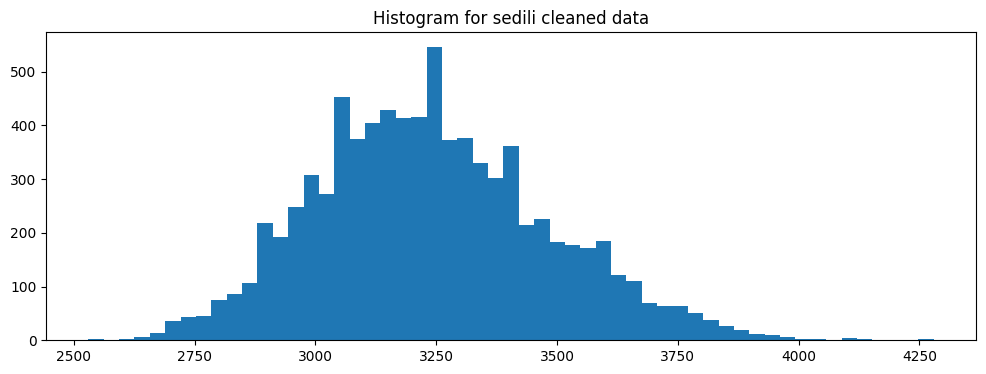

In [132]:
stats_stuff(sedili_resample_new, "sedili")

In [170]:
def test_percentile_stuff(data, dates):
    p = sts.scoreatpercentile(data, per=97)
    tides_above_90th=[]
    dates_above_90th=[]
    for i in range(len(data)):
        if data[i]>=p:
            tides_above_90th.append(data[i])
            dates_above_90th.append(dates[i])
    return tides_above_90th, dates_above_90th

In [171]:
geting_test_90, geting_dates_90=test_percentile_stuff(geting_resample_new, dates_geting)

In [172]:
subset = sd.sel(time=slice("1990-01-01", "2013-12-31"))
time_coords = subset['time'].values
time_coords=pd.to_datetime(time_coords, format='%Y-%m-%d')
positive_surge_days=[]
values = subset['surge-day'].values
for time, value in zip(time_coords, values):
        if value==1.0:
            print(f"Time: {time}, Value: {value}")
            positive_surge_days.append(time)

Time: 1990-01-04 00:00:00, Value: 1.0
Time: 1990-01-05 00:00:00, Value: 1.0
Time: 1990-01-07 00:00:00, Value: 1.0
Time: 1990-01-20 00:00:00, Value: 1.0
Time: 1990-01-21 00:00:00, Value: 1.0
Time: 1990-01-23 00:00:00, Value: 1.0
Time: 1990-02-01 00:00:00, Value: 1.0
Time: 1990-02-04 00:00:00, Value: 1.0
Time: 1990-02-05 00:00:00, Value: 1.0
Time: 1990-02-06 00:00:00, Value: 1.0
Time: 1990-02-07 00:00:00, Value: 1.0
Time: 1990-02-08 00:00:00, Value: 1.0
Time: 1990-02-09 00:00:00, Value: 1.0
Time: 1990-02-10 00:00:00, Value: 1.0
Time: 1990-11-22 00:00:00, Value: 1.0
Time: 1990-11-23 00:00:00, Value: 1.0
Time: 1990-11-24 00:00:00, Value: 1.0
Time: 1990-12-01 00:00:00, Value: 1.0
Time: 1990-12-02 00:00:00, Value: 1.0
Time: 1990-12-03 00:00:00, Value: 1.0
Time: 1990-12-04 00:00:00, Value: 1.0
Time: 1990-12-05 00:00:00, Value: 1.0
Time: 1990-12-06 00:00:00, Value: 1.0
Time: 1990-12-07 00:00:00, Value: 1.0
Time: 1990-12-11 00:00:00, Value: 1.0
Time: 1990-12-14 00:00:00, Value: 1.0
Time: 1990-1

In [173]:
def per_surge_days(data):
    k=0
    for i in range(len(data)):
        if data[i] in positive_surge_days:
            k+=1
    return (k/len(data)*100)


In [174]:
print(per_surge_days(geting_dates_90))

44.26877470355731


In [175]:
kuantan_test_90, kuantan_dates_90=test_percentile_stuff(kuantan_resample_new, dates_kuantan)
print(per_surge_days(kuantan_dates_90))

32.80632411067194


In [176]:
sedili_test_90, sedili_dates_90=test_percentile_stuff(sedili_resample_new, dates_sedili)
print(per_surge_days(sedili_dates_90))

40.15748031496063


In [177]:
cendering_test_90, cendering_dates_90=test_percentile_stuff(cendering_resample_new, dates_cendering)
print(per_surge_days(cendering_dates_90))

35.27131782945737


In [178]:
tioman_test_90, tioman_dates_90=test_percentile_stuff(tioman_resample_new, dates_tioman)
print(per_surge_days(tioman_dates_90))

31.40495867768595


In [179]:
tp_test_90, tp_dates_90=test_percentile_stuff(tp_resample_new, dates_tp)
print(per_surge_days(tp_dates_90))

25.099601593625497


In [180]:
jb_test_90, jb_dates_90=test_percentile_stuff(johor_resample_new, dates_jb)
print(per_surge_days(jb_dates_90))

21.428571428571427
